Preencher os campos abaixo:

**Nome:Roberto Paulo Sianciulis Júnior**

**Turma:05**


---


---
**Autor**: Roberto Paulo Sianciulis Júnior

**Contato**: `robertopsj@hotmail.com`

---

#Introdução

##Objetivo
Modelo Preditivo de grupos de risco de Imóveis

Produto financeiro: Consórcio

O **objetivo** do trabalho é **predizer grupos de risco de consórcio**,  especificamente da categoria de **imóveis**, pautado nas informações enviadas mensalmente por cada Administradora de Consórcio ao Banco Central.

A predição será realizada utilizando d**ados históricos e modelos estatísticos e algoritmos de Inteligência Artificial**, que selecionarão as **características mais relevantes** que explicam o perfil de alto ou baixo risco de um grupo de consórcio de imóveis.

Desta forma, a empresa poderá traçar **estratégias de relacionamento**, desenvolver **réguas de comunicação e ações preventivas** para minimizar de forma proativa uma possível perda financeira futura e garantir a sustentabilidade de sua operação.



##Contextualização do problema

O consórcio é um **produto planejado** e uma simples alteração nos indicadores citados acima pode comprometer a perenidade de toda a operação. O monitoraramento do perfil de risco dos grupos permite a administradora traçar estratégias de retenção, de comunicação e de vendas atencipadamente, além de garantir maior segurança para o negócio e seus clientes.

As Administradoras acompanham periodicamente indicadores de cotas ativas, taxas de administração, faixas de cartas de crédito dos bens, quantidade e duração de grupos e tem verificado um **aumento expressivo em cancelamento** e inadimplência das cotas nos últimos anos.


Assim, uma Administradora de Consórcio solicitou a **construção de um modelo preditivo** de grupos de imóveis, com o objetivo de** identificar o perfil de risco dos grupos no mercado.**

O cenário de alta competitividade no segmento de imóveis, atrelado a dinâmica peculiar do produto que é sensível as variações de diferentes alavancas, torna o modelo **um grande diferencial competitivo** que auxiliará a administradora a trabalhar de forma otimizada com seus grupos de imóveis.


#Base de dados

##Base Original

A base original foi obtida do site do banco central (https://www.bcb.gov.br/fis/Consorcios/port/consorcio_banco_de_dados.asp?frame=1), empilhando 56 relatórios mensais desde jan/2018 até Ago/2022, com as informações enviadas pelas Administradoras de Consórcios.

As informações são disponíbilizadas para download a partir do dia 10 do segundo mês subsequente ao da data-base.

Existem diversos segmentos para análise, porém nesse estudo optou-se pela análise do segmento 1.
(* 1 = bens imóveis; 2 = tratores, equipamentos rodoviários, máquinas agrícolas, embarcações, aeronaves e veículos automotores de carga e transporte coletivo; 3 = veículos automotores não incluídos no segmento 2; 4 = motocicletas e motonetas; 5 = outros bens móveis duráveis; 6 = serviços turísticos)

A cada data-base são atualizadas as informações relativas aos últimos 12 períodos. Isso implica que as substituições de documentos relativos a datas-bases superiores a 12 meses não alterarão o banco de dados.


##Detalhamento dos tratamentos

1 Remover espaços duplos em todos os campos

2 Excluir a última linha (se não tiver conteúdo válido)

3 Mudar o campo "#Nome_da_Administradora" para "Nome_da_Administradora"

4 Criar variável chave (nome_da_Administradora + "_"+Código_do_grupo)

5 F1 - filtrar base deixando somente grupos de administradoras que começaram em 2018 pra frente (isto é, tem Número_da_assembléia_geral_ordinária=1)

6 Classificar a base por chave (nome administradora + número do grupo) e Número_da_assembléia_geral_ordinária em ordem crescente

7 Criar o campo Variação Cotas excluídas --> fórmula: se o Número_da_assembléia_geral_ordinária for igual a 1 do campo "chave" então a Var_cotas_Excluidas é igual a 0, senão sempre fazer a linha abaixo menos a linha de cima pelo campo Quantidade_de_cotas_excluídas

8 Criar o campo parcela --> fórmula: (Valor_médio_do_bem + (Valor_médio_do_bem*Taxa_de_administração))/Prazo_do_grupo_em_meses

9 Criar o campo carteira --> fórmula: Quantidade_de_cotas_ativas_em_dia + Quantidade_de_cotas_ativas_contempladas_inadimplentes + Quantidade_de_cotas_ativas_não_contempladas_inadimplentes

10 Adicionar de variável externa a base  INCC_DI (utilizando o campo Data_base como chave)

11 Criar o campo Churn sobre carteira ativa --> fórmula: Var_cotas_Excluidas / Carteira

12 F2 - erros de preenchimento de informação: tirar da base grupos de administradoras com valores medios de bem venda zerados, var_cotas_excluidas negativa ou perc_churn_s_carteira >1

13 F3 - criar o campo condição (grupo "novo" criado em 2021 e 2022 e grupo "antigo" criado anterior a 2021, basta filtrar o Número_da_assembléia_geral_ordinária igual 1 e aplicar as regras segundo a data base)

14 Criar o campo Faixa_parcelas

15 Criar o campo percentual de inadimplência sobre carteira ativa --> fórmula: (Quantidade_de_cotas_ativas_contempladas_inadimplentes + Quantidade_de_cotas_ativas_não_contempladas_inadimplentes) / carteira

16 Excluir o codigo_do_segmento pois avaliaremos um segmento apenas no estudo (código segmento =1 - bens imóveis)

17 Criar o campo idade --> fórmula: se o campo Número_da_assembléia_geral_ordinária for maior do que Prazo_do_grupo_em_meses então 1, senão Número_da_assembléia_geral_ordinária /  Prazo_do_grupo_em_meses

18 Criar o campo faixa_idade

19 Criar o campo faixa_prazo

20 Criar o campo Receita_potencial --> fórmula: carteira * Taxa_de_administração * Valor_médio_do_bem

21 Criar o campo Risco --> fórmula: se o Perc_churn_s_carteira<=3%, então 0 senão 1


##Dicionário da base de dados



**Risco**	Indicação se o grupo de imóveis de consórcio é de alto risco (1) ou baixo risco (0)

**Chave_nome_adm_e_cod_grupo**	União dos campos "Nome_da_Administradora" e "Codigo_do_grupo" para facilitar análises

**Nome_da_Administradora**	Nome reduzido da instituição no Unicad

**CNPJ_da_Administradora**	Raiz do Cadastro Nacional da Pessoa Jurídica - CNPJ com 8 dígitos da Administradora de Consórcio

**Data_base**	Data-base do documento, com formato AAAA-MM, onde AAAA = ano e MM = mês (01 a 12)

**Codigo_do_grupo**	Código do grupo. Identifica o grupo no sistema da administradora.

**Numero_da_assembleia_geral_ordinária**	Número de assembléias gerais ordinárias realizadas até a data-base.

**Valor_medio_do_bem**	Média aritmética simples dos preços dos bens adotados como referência do valor do crédito no contrato de participação dos consorciados ativos do grupo, na data da assembleia geral ordinária imediatamente anterior à data-base

**Taxa_de_administracao**	Percentual correspondente à média aritmética simples das taxas de administração contratuais (incluídas as antecipações)  das cotas de consorciados ativos na data-base

**Prazo_do_grupo_em_meses**	Prazo do grupo em meses. É prazo de duração do grupo, em meses.

**Quantidade_de_cotas_ativas_em_dia**	Total de cotas, contempladas ou não, de consorciados ativos cujo percentual em atraso é inferior ao percentual de amortização mensal, na data-base.

**Quantidade_de_cotas_ativas_contempladas_inadimplentes**	Total de cotas contempladas de consorciados ativos cujo percentual em atraso é igual ou superior ao percentual de amortização mensal, na data-base.

**Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes**	Total de cotas não contempladas de consorciados ativos cujo percentual em atraso é igual ou superior ao percentual de amortização mensal, na data-base.

**Quantidade_de_cotas_ativas_contempladas_no_mes**	Total de cotas contempladas (por sorteio ou por lance) no mês da data-base, de consorciados ativos

**Quantidade_de_cotas_excluidas**	Total, na data-base, de cotas de consorciados excluídos (por desistência declarada ou por deixar de cumprir as obrigações financeiras contratuais)

**Quantidade_de_cotas_ativas_quitadas**	Total de cotas, contempladas ou não, de consorciados ativos considerados quitados pela administradora e cujo saldo remanescente para quitação integral das responsabilidades financeiras previstas no contrato de adesão seja inferior ao valor equivalente a uma prestação.

**Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao**	Total, na data-base, de cotas contempladas (por sorteio ou por lance) de consorciados ativos, cujo crédito, total ou parcial, se encontra depositado em conta vinculada a contemplações, à disposição do consorciado.  

**Carteira_ativa**	Total de cotas ativas do grupo no período

**Carteira_inadimplente**	Total de cotas ativas inadimplentes do grupo no período

**Parcela**	Valor estimado da parcela do grupo

**Idade**	Faixa de idade em que o grupo se encontra (calculado com base no numero de assembleias ordinárias decorridas e prazo de duração do grupo)

**INCC_DI**	Índice Nacional de Custo de Construção — Disponibilidade Interna. Essa modalidade tem relação com a alteração dos custos na construção civil do primeiro ao último dia do mês de referência.

**Var_cotas_Excluidas**	Variação da quantidade de cotas excluídas mês a mês de cada cada grupo, de cada administradora

**Perc_churn**	Faixa de churn em que o grupo se encontra (baseado na quantidade de cotas excluídas e cotas totais do grupo)

**Perc_inadimplencia**	Faixa de inadimplencia em que o grupo se encontra (baseado na quantidade de cotas inadimplentes e cotas ativas do grupo)

**Condicao**	Grupos novos (iniciados em 2021 e 2022) e grupos antigos (antes de 2021)

**Fx_parcela**	Faixas de parcelas que os grupos apresentam

**Fx_prazo**	Faixas de prazos de duração que os grupos apresentam

**Fx_idade**	Faixas de idade dos grupos baseada no número da assembleia geral ordinária pelo prazo de cada grupo

**Receita_potencial**	Receita potencial do grupo (carteira ativa * taxa de administração * valor medio do bem)

**Índice_de_correção**	Índice contratado como critério para atualização do preço do bem adotado como referência do valor do crédito


# ABT - Analytical Base Tables

##Importar as bibliotecas

In [ ]:
import os
import numpy as np                          #biblioteca para cálculo matricial e também fornece estruturas de dados para o pandas
import pandas as pd                         #biblioteca para análise e transformação de dados
import matplotlib.pyplot as plt             #biblioteca para elaboração de gráficos
import seaborn as sns                       #biblioteca para elaboração de gráficos
import statsmodels.api as sm
import statsmodels.formula.api as smf       #create a model from a formula e dataframe
from statsmodels.formula.api import ols

!pip install feature_engine
from sklearn.model_selection import train_test_split    #separar o data set em treino e teste
from sklearn.metrics import confusion_matrix    #importa a matriz de confusão
import itertools
from collections import OrderedDict


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 4.0 MB/s eta 0:00:00


## Carregando os Dados

Vamos carregar a tabela e entendê-la.

In [ ]:
from google.colab import drive                      #acessar o google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pasta_raiz = '/content/drive/My Drive/datasets/TCC' #acessar a pasta raiz do trablho

In [ ]:
df = pd.read_excel(f'{pasta_raiz}/base_tcc_14122022.xlsx', sheet_name='base_de_dados') #ler a base de dados
df

,Risco,Chave_nome_adm_e_cod_grupo,Nome_da_Administradora,CNPJ_da_Administradora,Data_base,Codigo_do_grupo,Numero_da_assembleia_geral_ordinária,Valor_medio_do_bem,Taxa_de_administracao,Prazo_do_grupo_em_meses,...,INCC_DI,Var_cotas_Excluidas,Perc_churn,Perc_inadimplencia,Condicao,Fx_parcela,Fx_prazo,Fx_idade,Receita_potencial,Índice_de_correção
0,0,ACERTE ADM CONS LTDA. _303,ACERTE ADM CONS LTDA.,91984633,201901,303,1,91418.92,0.244595,240,...,0.0049,0,0.000000,0.000000,antigo,0 - 635,de 15 a 20 anos,0 - 0.2,1.654682e+06,99
1,0,ACERTE ADM CONS LTDA. _303,ACERTE ADM CONS LTDA.,91984633,201902,303,2,91559.63,0.243148,240,...,0.0009,1,0.009259,0.101852,antigo,0 - 635,de 15 a 20 anos,0 - 0.2,2.404356e+06,99
2,0,ACERTE ADM CONS LTDA. _303,ACERTE ADM CONS LTDA.,91984633,201903,303,3,90884.96,0.243009,240,...,0.0031,0,0.000000,0.106195,antigo,0 - 635,de 15 a 20 anos,0 - 0.2,2.495700e+06,99
3,0,ACERTE ADM CONS LTDA. _303,ACERTE ADM CONS LTDA.,91984633,201904,303,4,88698.63,0.242123,240,...,0.0038,1,0.006849,0.157534,antigo,0 - 635,de 15 a 20 anos,0 - 0.2,3.135497e+06,99
4,0,ACERTE ADM CONS LTDA. _303,ACERTE ADM CONS LTDA.,91984633,201905,303,5,85857.84,0.241520,240,...,0.0003,1,0.004902,0.352941,antigo,0 - 635,de 15 a 20 anos,0 - 0.2,4.230216e+06,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15966,1,ZEMA ADM. CONSÓRCIOLTDA _1018,ZEMA ADM. CONSÓRCIOLTDA,23367634,202208,1018,12,112085.02,0.287976,200,...,0.0009,72,0.085511,0.304038,novo,635 - 1270,de 15 a 20 anos,0 - 0.2,2.717788e+07,99
15967,0,ZEMA ADM. CONSÓRCIOLTDA _1019,ZEMA ADM. CONSÓRCIOLTDA,23367634,202205,1019,1,381963.19,0.301362,200,...,0.0228,0,0.000000,0.055215,novo,1905 - 2540,de 15 a 20 anos,0 - 0.2,3.752560e+07,3
15968,1,ZEMA ADM. CONSÓRCIOLTDA _1019,ZEMA ADM. CONSÓRCIOLTDA,23367634,202206,1019,2,391163.27,0.302008,200,...,0.0214,30,0.061224,0.132653,novo,2540 - 3175,de 15 a 20 anos,0 - 0.2,5.788591e+07,3
15969,1,ZEMA ADM. CONSÓRCIOLTDA _1019,ZEMA ADM. CONSÓRCIOLTDA,23367634,202207,1019,3,401970.80,0.304126,200,...,0.0086,35,0.051095,0.191241,novo,2540 - 3175,de 15 a 20 anos,0 - 0.2,8.374098e+07,3


##Conhecendo a base de dados

In [ ]:
#Exibe a quantidade de linhas e colunas
df.shape

(15971, 31)

In [ ]:
df.dtypes       #tipos das variáveis

Risco                                                              int64
Chave_nome_adm_e_cod_grupo                                        object
Nome_da_Administradora                                            object
CNPJ_da_Administradora                                             int64
Data_base                                                          int64
Codigo_do_grupo                                                   object
Numero_da_assembleia_geral_ordinária                               int64
Valor_medio_do_bem                                               float64
Taxa_de_administracao                                            float64
Prazo_do_grupo_em_meses                                            int64
Quantidade_de_cotas_ativas_em_dia                                  int64
Quantidade_de_cotas_ativas_contempladas_inadimplentes              int64
Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes          int64
Quantidade_de_cotas_ativas_contempladas_no_mes     

In [ ]:
df.isnull().sum()       #verificação se tem nulos

Risco                                                            0
Chave_nome_adm_e_cod_grupo                                       0
Nome_da_Administradora                                           0
CNPJ_da_Administradora                                           0
Data_base                                                        0
Codigo_do_grupo                                                  0
Numero_da_assembleia_geral_ordinária                             0
Valor_medio_do_bem                                               0
Taxa_de_administracao                                            0
Prazo_do_grupo_em_meses                                          0
Quantidade_de_cotas_ativas_em_dia                                0
Quantidade_de_cotas_ativas_contempladas_inadimplentes            0
Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes        0
Quantidade_de_cotas_ativas_contempladas_no_mes                   0
Quantidade_de_cotas_excluidas                                 

In [ ]:
# Variáveis chaves da tabela 5
key_vars = ['Chave_nome_adm_e_cod_grupo',
            'Nome_da_Administradora',
            'Codigo_do_grupo',
            'CNPJ_da_Administradora',
            'Data_base'
            ]

# Variáveis numéricas 20
num_vars = ['Prazo_do_grupo_em_meses',
            'INCC_DI',
            'Numero_da_assembleia_geral_ordinária',
            'Valor_medio_do_bem',
            'Taxa_de_administracao',
            'Quantidade_de_cotas_ativas_em_dia',
            'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
            'Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',
            'Quantidade_de_cotas_ativas_contempladas_no_mes',
            'Quantidade_de_cotas_excluidas',
            'Quantidade_de_cotas_ativas_quitadas',
            'Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao',
            'Carteira_ativa',
            'Carteira_inadimplente',
            'Parcela',
            'Idade',
            'Var_cotas_Excluidas',
            'Perc_churn',
            'Perc_inadimplencia',
            'Receita_potencial']

# Variáveis categóricas 5
cat_vars = ['Índice_de_correção',
            'Condicao',
            'Fx_parcela',
            'Fx_prazo',
            'Fx_idade']

# Variável resposta/target 1
target = 'Risco'

# criando a lista com as features
features = cat_vars + num_vars

# Separando a base de features
X = df[features]

# Separando o target
y = df[target]

# AED Análise Exploratória dos dados

In [ ]:
# Essa opção do pandas formata a visualização dos valores das colunas com o tipo
# float (decimal) com duas casas decimais.
pd.options.display.float_format = "{:.4f}".format

## Medidas de posição

O describe fornece as estatísticas descritivas que apresentam a tendência central, a dispersão e a forma da distribuição do conjunto de dados. Por exemplo: ```quantidade, média, desvio padrão, mínimo, máximo, quartis```

É importante fazer uso dos cálculos dessas medidas para entender melhor o comportamento dos seus dados antes de partir para análises mais aprofundadas.



In [ ]:
df[num_vars].describe()

,Prazo_do_grupo_em_meses,INCC_DI,Numero_da_assembleia_geral_ordinária,Valor_medio_do_bem,Taxa_de_administracao,Quantidade_de_cotas_ativas_em_dia,Quantidade_de_cotas_ativas_contempladas_inadimplentes,Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes,Quantidade_de_cotas_ativas_contempladas_no_mes,Quantidade_de_cotas_excluidas,Quantidade_de_cotas_ativas_quitadas,Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao,Carteira_ativa,Carteira_inadimplente,Parcela,Idade,Var_cotas_Excluidas,Perc_churn,Perc_inadimplencia,Receita_potencial
count,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000,15971.0000
mean,195.9534,0.0088,15.7938,176199.4675,0.2024,621.7876,2.7026,95.4355,3.3556,517.4595,2.5002,33.0073,719.9257,98.1382,1083.2268,0.0828,33.7518,0.0471,0.1320,24066870.9258
std,26.0904,0.0065,11.9309,117332.6461,0.0461,433.9867,3.9192,122.2741,2.7569,626.5488,9.3461,37.7951,511.3824,122.8028,704.0149,0.0652,45.8521,0.0515,0.0981,23801844.6051
min,36.0000,0.0003,1.0000,34287.4400,0.0028,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0000,0.0000,256.6609,0.0025,0.0000,0.0000,0.0000,96482.5786
25%,186.0000,0.0038,6.0000,90393.4150,0.1800,380.0000,0.0000,31.0000,1.0000,137.0000,0.0000,10.0000,447.0000,34.0000,569.6700,0.0312,9.0000,0.0158,0.0711,9393350.3402
50%,192.0000,0.0072,13.0000,126970.4400,0.2081,506.0000,1.0000,62.0000,3.0000,366.0000,0.0000,23.0000,584.0000,65.0000,787.3954,0.0667,20.0000,0.0343,0.1081,16695438.9059
75%,200.0000,0.0116,23.0000,225792.8450,0.2307,735.0000,4.0000,118.0000,4.0000,694.0000,1.0000,43.0000,866.0000,122.0000,1403.6780,0.1200,43.0000,0.0610,0.1707,32324424.7948
max,400.0000,0.0228,55.0000,1091620.8800,0.3159,4646.0000,44.0000,2267.0000,56.0000,8640.0000,179.0000,451.0000,6755.0000,2288.0000,6594.5846,0.4417,1322.0000,0.8778,0.9231,391475726.7344


#### Amplitude

Diferença entre o valor máximo e o valor mínimo.

In [ ]:
df_desc = df[num_vars].describe()

In [ ]:
df_desc.loc['max'] - df_desc.loc['min']     #Cálculo da amplitude

Prazo_do_grupo_em_meses                                               364.0000
INCC_DI                                                                 0.0225
Numero_da_assembleia_geral_ordinária                                   54.0000
Valor_medio_do_bem                                                1057333.4400
Taxa_de_administracao                                                   0.3131
Quantidade_de_cotas_ativas_em_dia                                    4645.0000
Quantidade_de_cotas_ativas_contempladas_inadimplentes                  44.0000
Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes            2267.0000
Quantidade_de_cotas_ativas_contempladas_no_mes                         56.0000
Quantidade_de_cotas_excluidas                                        8640.0000
Quantidade_de_cotas_ativas_quitadas                                   179.0000
Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao         451.0000
Carteira_ativa                                      

#### Intervalo Interquartil

É a diferença entre o terceiro e o primeiro quartil (Q3 - Q1).

Descreve a dispersão dos 50% dados centrais.

In [ ]:
df_desc.loc['75%'] - df_desc.loc['25%'] #cálculo do intervalo interquartil

Prazo_do_grupo_em_meses                                               14.0000
INCC_DI                                                                0.0078
Numero_da_assembleia_geral_ordinária                                  17.0000
Valor_medio_do_bem                                                135399.4300
Taxa_de_administracao                                                  0.0507
Quantidade_de_cotas_ativas_em_dia                                    355.0000
Quantidade_de_cotas_ativas_contempladas_inadimplentes                  4.0000
Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes             87.0000
Quantidade_de_cotas_ativas_contempladas_no_mes                         3.0000
Quantidade_de_cotas_excluidas                                        557.0000
Quantidade_de_cotas_ativas_quitadas                                    1.0000
Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao         33.0000
Carteira_ativa                                                  

## Medidas de dispersão


Mostram se os dados estão mais concentrados ou mais dispersos em torno de alguma medida de tendência central, em geral, a média.

### Desvio Padrão

O desvio padrão também é uma medida de dispersão e indica o quanto os dados estão afastados da média. Ao contrário da variância, em alguns cenários não é necessário que a discrepancia seja perceptível, pois esse valor pode ser considerado como um erro. E desta forma, se utilizássemos a variância para o erro, os valores mais discrepantes da média teriam um erro desproporcional e prejudicaria o experimento em questão.

Nesse cenário que podemos utilizar o desvio padrão.

O cálculo do desvio padrão é dado pela raiz quadrara da variância.

In [ ]:
df[num_vars].std() #desvio padrão

Prazo_do_grupo_em_meses                                               26.0904
INCC_DI                                                                0.0065
Numero_da_assembleia_geral_ordinária                                  11.9309
Valor_medio_do_bem                                                117332.6461
Taxa_de_administracao                                                  0.0461
Quantidade_de_cotas_ativas_em_dia                                    433.9867
Quantidade_de_cotas_ativas_contempladas_inadimplentes                  3.9192
Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes            122.2741
Quantidade_de_cotas_ativas_contempladas_no_mes                         2.7569
Quantidade_de_cotas_excluidas                                        626.5488
Quantidade_de_cotas_ativas_quitadas                                    9.3461
Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao         37.7951
Carteira_ativa                                                  

### Variância

A variância é uma medida que expressa quanto os dados de um conjunto estão afastados de seu valor esperado. O cálculo é feito pela média dos quadrados dos desvios em relação a média aritmética.

Quanto maior for a variância, mais distantes da média estarão os valores, e quanto menor for a variância, mais próximos os valores estarão da média. As vezes é importante visualizar essa discrepancia seja mais perceptível e por isso utiliza-se a variância.

In [ ]:
df[num_vars].var()  #variância

Prazo_do_grupo_em_meses                                                     680.7080
INCC_DI                                                                       0.0000
Numero_da_assembleia_geral_ordinária                                        142.3475
Valor_medio_do_bem                                                  13766949851.8354
Taxa_de_administracao                                                         0.0021
Quantidade_de_cotas_ativas_em_dia                                        188344.4268
Quantidade_de_cotas_ativas_contempladas_inadimplentes                        15.3605
Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes                 14950.9578
Quantidade_de_cotas_ativas_contempladas_no_mes                                7.6005
Quantidade_de_cotas_excluidas                                            392563.3962
Quantidade_de_cotas_ativas_quitadas                                          87.3498
Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao    

### Coeficiente de variação

Mede a variabilidade numa escala percentual independente da unidade de medida ou da ordem de grandeza da variável.

In [ ]:
cv = (df[num_vars].std()/df[num_vars].mean())*100  #coeficiente de variação
print(cv)

Prazo_do_grupo_em_meses                                          13.3146
INCC_DI                                                          74.5951
Numero_da_assembleia_geral_ordinária                             75.5419
Valor_medio_do_bem                                               66.5908
Taxa_de_administracao                                            22.7873
Quantidade_de_cotas_ativas_em_dia                                69.7966
Quantidade_de_cotas_ativas_contempladas_inadimplentes           145.0150
Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes       128.1222
Quantidade_de_cotas_ativas_contempladas_no_mes                   82.1585
Quantidade_de_cotas_excluidas                                   121.0817
Quantidade_de_cotas_ativas_quitadas                             373.8211
Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao   114.5054
Carteira_ativa                                                   71.0327
Carteira_inadimplente                              

### Assimetria (skewness)

Mede o grau de simetria da curva, em relação a distribuição normal.

Para dados normalmente distribuídos, a assimetria é bem próxima de zero.

Uma assimetria positiva, com valor > 0, significa que a cauda da distribuição está mais para a direita. Ou seja, que os valores de moda < mediana < média.

Uma assimetria negativa, com valor < 0, significa que a cauda da distribuição está mais para a esquerda. Ou seja, que os valores de média < mediana < moda.

In [ ]:
df[num_vars].skew() #assimetria

Prazo_do_grupo_em_meses                                         -0.2635
INCC_DI                                                          0.9450
Numero_da_assembleia_geral_ordinária                             0.8461
Valor_medio_do_bem                                               1.4875
Taxa_de_administracao                                           -0.7144
Quantidade_de_cotas_ativas_em_dia                                2.4930
Quantidade_de_cotas_ativas_contempladas_inadimplentes            2.7254
Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes        5.5934
Quantidade_de_cotas_ativas_contempladas_no_mes                   2.7338
Quantidade_de_cotas_excluidas                                    4.2661
Quantidade_de_cotas_ativas_quitadas                              8.7634
Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao    3.7960
Carteira_ativa                                                   2.9651
Carteira_inadimplente                                           

### Curtose (kurtosis)

Mede o grau de achatamento da curva, em relação a curva normal.

Se o valor encontrado é igual 0, você tem uma distribuição mesocúrtica; se maior que 0, leptocúrtica, correspondendo a uma curva mais pontuda; se menor que 0, platicúrtica, ou seja, uma curva mais achatada, com maior variabilidade dos dados.

In [ ]:
df[num_vars].kurtosis()  #curtose

Prazo_do_grupo_em_meses                                          7.8623
INCC_DI                                                         -0.1809
Numero_da_assembleia_geral_ordinária                            -0.0526
Valor_medio_do_bem                                               2.4809
Taxa_de_administracao                                            0.7759
Quantidade_de_cotas_ativas_em_dia                                9.7315
Quantidade_de_cotas_ativas_contempladas_inadimplentes           11.1773
Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes       59.8040
Quantidade_de_cotas_ativas_contempladas_no_mes                  18.8212
Quantidade_de_cotas_excluidas                                   31.8933
Quantidade_de_cotas_ativas_quitadas                             99.8638
Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao   23.1051
Carteira_ativa                                                  15.9921
Carteira_inadimplente                                           

# Cria tabela de frequencia para variável de resposta

In [ ]:
freq_Risco = pd.concat([pd.DataFrame(df['Risco'].value_counts()),
                                    pd.DataFrame(df['Risco'].value_counts(normalize=True)*100)],
                                    axis=1)
freq_Risco.columns = ['Quantidade', 'Porcentagem']
freq_Risco.round(4)

,Quantidade,Porcentagem
1,8877,55.5820
0,7094,44.4180


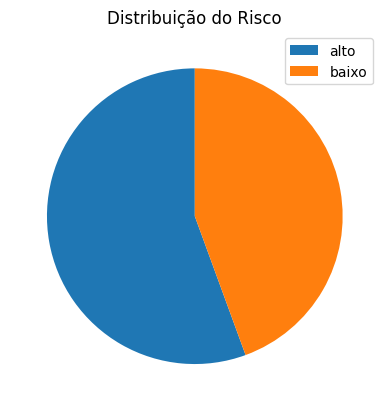

In [ ]:
#plotar gráfico de pizza
slices, text = plt.pie(df.Risco.value_counts(),
                     startangle=90)
plt.title("Distribuição do Risco")
plt.legend(["alto","baixo"])
plt.show()

# Variáveis de identificação da base

In [ ]:
df['Nome_da_Administradora']

0          ACERTE ADM CONS LTDA. 
1          ACERTE ADM CONS LTDA. 
2          ACERTE ADM CONS LTDA. 
3          ACERTE ADM CONS LTDA. 
4          ACERTE ADM CONS LTDA. 
                   ...           
15966    ZEMA ADM. CONSÓRCIOLTDA 
15967    ZEMA ADM. CONSÓRCIOLTDA 
15968    ZEMA ADM. CONSÓRCIOLTDA 
15969    ZEMA ADM. CONSÓRCIOLTDA 
15970    ZEMA ADM. CONSÓRCIOLTDA 
Name: Nome_da_Administradora, Length: 15971, dtype: object

In [ ]:
f'A quantidade de períodos distintos que a base contem é {len(df["Data_base"].unique())}'

'A quantidade de períodos distintos que a base contem é 56'

In [ ]:
f'O período mais antigo presente na base é de {df["Data_base"].min()}. Já o mais recente é {df["Data_base"].max()}.'

'O período mais antigo presente na base é de 201801. Já o mais recente é 202208.'

In [ ]:
f'A quantidade de Administradoras de Consórcio distintas que a base contem é {len(df["Nome_da_Administradora"].unique())}'

'A quantidade de Administradoras de Consórcio distintas que a base contem é 66'

In [ ]:
f'A quantidade de grupos distintos que a base contem é {len(df["Codigo_do_grupo"].unique())}'

'A quantidade de grupos distintos que a base contem é 755'

In [ ]:
f'A quantidade de Administradoras e grupos distintos que a base contem é {len(df["Chave_nome_adm_e_cod_grupo"].unique())}'

'A quantidade de Administradoras e grupos distintos que a base contem é 784'

# Cria tabela de frequencias para variáveis categórias

In [ ]:
#Variável Índice_de_correção
freq_indice_de_correcao = pd.concat([pd.DataFrame(df['Índice_de_correção'].value_counts()),
                                    pd.DataFrame(df['Índice_de_correção'].value_counts(normalize=True)*100)],
                                    axis=1)
freq_indice_de_correcao.columns = ['Quantidade', 'Porcentagem']
freq_indice_de_correcao.round(2)

,Quantidade,Porcentagem
3,9063,56.7500
99,5726,35.8500
4,559,3.5000
2,335,2.1000
6,161,1.0100
1,127,0.8000


In [ ]:
#Variável Condicao
freq_Condicao = pd.concat([pd.DataFrame(df['Condicao'].value_counts()),
                                    pd.DataFrame(df['Condicao'].value_counts(normalize=True)*100)],
                                    axis=1)
freq_Condicao.columns = ['Quantidade', 'Porcentagem']
freq_Condicao.round(4)

,Quantidade,Porcentagem
antigo,11854,74.2220
novo,4117,25.7780


In [ ]:
#variável Fx_parcela
freq_Fx_parcela = pd.concat([pd.DataFrame(df['Fx_parcela'].value_counts()),
                                    pd.DataFrame(df['Fx_parcela'].value_counts(normalize=True)*100)],
                                    axis=1)
freq_Fx_parcela.columns = ['Quantidade', 'Porcentagem']
freq_Fx_parcela.round(4)

,Quantidade,Porcentagem
635 - 1270,5840,36.5663
0 - 635,5398,33.7988
1270 - 1905,2259,14.1444
1905 - 2540,1611,10.0870
2540 - 3175,691,4.3266
3175 - 3810,156,0.9768
3810 - 4445,10,0.0626
5715 - 6350,4,0.0250
6350 - 6985,2,0.0125


In [ ]:
#Variável Fx_prazo
freq_Fx_prazo = pd.concat([pd.DataFrame(df['Fx_prazo'].value_counts()),
                                    pd.DataFrame(df['Fx_prazo'].value_counts(normalize=True)*100)],
                                    axis=1)
freq_Fx_prazo.columns = ['Quantidade', 'Porcentagem']
freq_Fx_prazo.round(4)

,Quantidade,Porcentagem
de 15 a 20 anos,11938,74.7480
de 10 a 15 anos,3226,20.1991
de 5 a 10 anos,504,3.1557
acima de 20,258,1.6154
até 5 anos,45,0.2818


In [ ]:
#variável Fx_idade
freq_Fx_idade = pd.concat([pd.DataFrame(df['Fx_idade'].value_counts()),
                                    pd.DataFrame(df['Fx_idade'].value_counts(normalize=True)*100)],
                                    axis=1)
freq_Fx_idade.columns = ['Quantidade', 'Porcentagem']
freq_Fx_idade.round(4)

,Quantidade,Porcentagem
0 - 0.2,14927,93.4632
0.2 - 0.4,1036,6.4868
0.4 - 0.6,8,0.0501


**Resumo análise:**

O valor das parcelas está concentrado nas faixas mais baixas, entre 0 e 1270
reais

A maioria dos grupos ainda encontra-se no início do contrato, faixa de 0 a 20% de idade.

A maior parte dos grupos possui prazo de duração de 15 a 20 anos de contrato

Mais de 70% dos registros da base referem-se a grupos antigos (formados antes de 2021)

Os grupos apresentam concentração de mais de 90% nos índices de correção 3 e 99.


## Análise Bivariada

análise de cada váriável categórica versus a variável risco

In [ ]:
pd.crosstab(df.Índice_de_correção,df.Risco)

Risco,0,1
Índice_de_correção,,
1,83,44
2,320,15
3,4245,4818
4,426,133
6,44,117
99,1976,3750


Contratos indexados por certos índices parecem discriminar bem o alto risco, como é o caso dos índices 6 e 99, bem como o baixo risco,  como é o caso dos índices 2 e 4.


In [ ]:
pd.crosstab(df.Condicao,df.Risco)

Risco,0,1
Condicao,,
antigo,5579,6275
novo,1515,2602


A distribuição do risco para os grupos antigos é ligeiramente menor, ou seja, os grupos iniciados antes de 2021 tendem a ser um ligeiramente menos arriscados do que os grupos iniciados de 2021 em diante.

In [ ]:
pd.crosstab(df.Fx_parcela,df.Risco)

Risco,0,1
Fx_parcela,,
0 - 635,2186,3212
1270 - 1905,1064,1195
1905 - 2540,1031,580
2540 - 3175,439,252
3175 - 3810,73,83
3810 - 4445,10,0
5715 - 6350,0,4
635 - 1270,2290,3550
6350 - 6985,1,1


Contratos com parcelas menores tendem a ser mais arriscados do que contratos com parcelas maiores.


In [ ]:
pd.crosstab(df.Fx_prazo,df.Risco)

Risco,0,1
Fx_prazo,,
acima de 20,101,157
até 5 anos,42,3
de 10 a 15 anos,1642,1584
de 15 a 20 anos,4858,7080
de 5 a 10 anos,451,53


O prazo dos contratos dos grupos parece discriminar bem o risco dos grupos. Prazos mais curtos tendem a apresentar um risco mais baixo do que grupos com contratos de longo prazo (acima de 15 anos)


In [ ]:
pd.crosstab(df.Fx_idade,df.Risco)

Risco,0,1
Fx_idade,,
0 - 0.2,6287,8640
0.2 - 0.4,801,235
0.4 - 0.6,6,2


A composição da idade parece discriminar a variável Risco. Grupos com menos de 20% de cumprimento do prazo planejado, tendem a apresentar mais de 50% de chance de terem risco alto.


# Análise variáveis numéricas

In [ ]:
df[num_vars].columns.values

array(['Prazo_do_grupo_em_meses', 'INCC_DI',
       'Numero_da_assembleia_geral_ordinária', 'Valor_medio_do_bem',
       'Taxa_de_administracao', 'Quantidade_de_cotas_ativas_em_dia',
       'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_contempladas_no_mes',
       'Quantidade_de_cotas_excluidas',
       'Quantidade_de_cotas_ativas_quitadas',
       'Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao',
       'Carteira_ativa', 'Carteira_inadimplente', 'Parcela', 'Idade',
       'Var_cotas_Excluidas', 'Perc_churn', 'Perc_inadimplencia',
       'Receita_potencial'], dtype=object)

## Prazo_do_grupo_em_meses

<Axes: ylabel='Prazo_do_grupo_em_meses'>

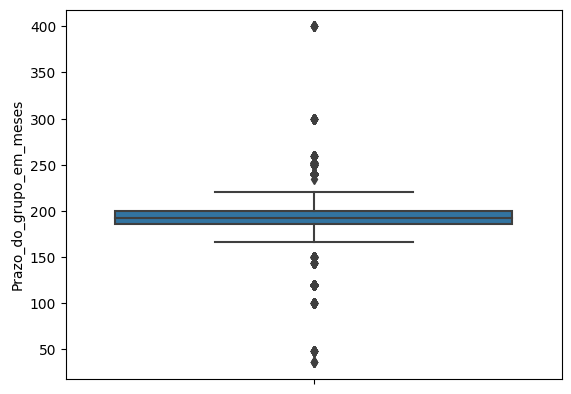

In [ ]:
sns.boxplot(y='Prazo_do_grupo_em_meses',data=df)

<Axes: >

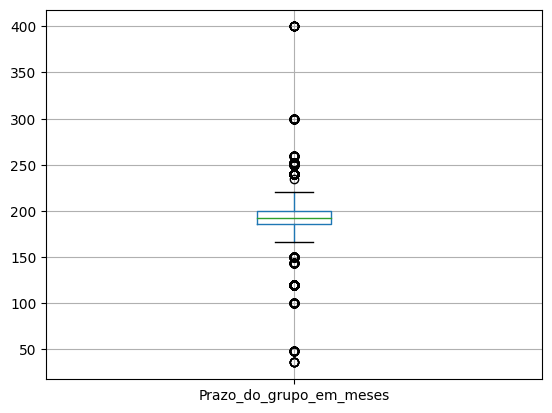

In [ ]:
%matplotlib inline

df.boxplot(column='Prazo_do_grupo_em_meses')

array([[<Axes: title={'center': 'Prazo_do_grupo_em_meses'}>]],
      dtype=object)

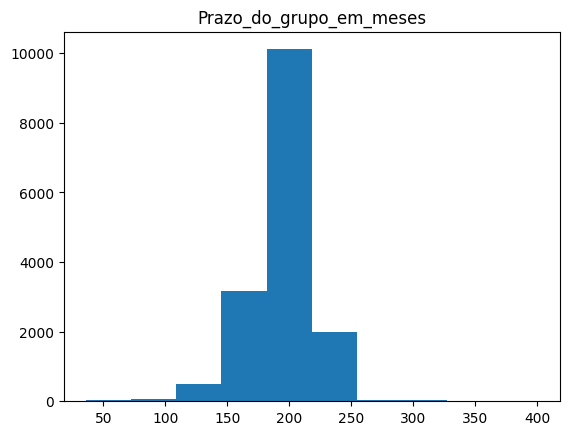

In [ ]:
from seaborn.widgets import color_palette
df.hist("Prazo_do_grupo_em_meses",grid=False)

<Axes: xlabel='Risco', ylabel='Prazo_do_grupo_em_meses'>

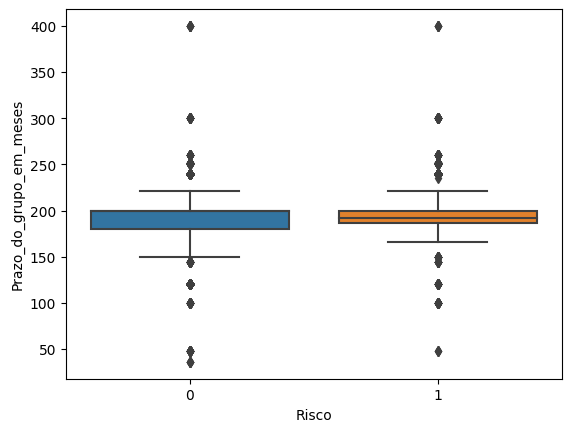

In [ ]:
sns.boxplot(x='Risco',y='Prazo_do_grupo_em_meses',data=df)

A base apresenta metade dos grupos de consórcio de imóveis com prazos até 192 meses e 75% dos grupos com prazos abaixo de 200 meses. Os grupos mais curtos possuem 36 meses de duração e os mais longos 400 meses.
Verificamos uma distribuição assimétrica à direita, sem muita dispersão dos dados em relação à média, indicando poucos grupos com prazos maiores de 200 meses.


## INCC_DI

<Axes: ylabel='INCC_DI'>

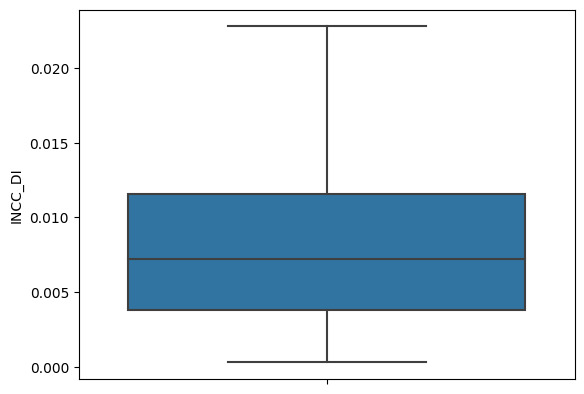

In [ ]:
sns.boxplot(y='INCC_DI',data=df)

array([[<Axes: title={'center': 'INCC_DI'}>]], dtype=object)

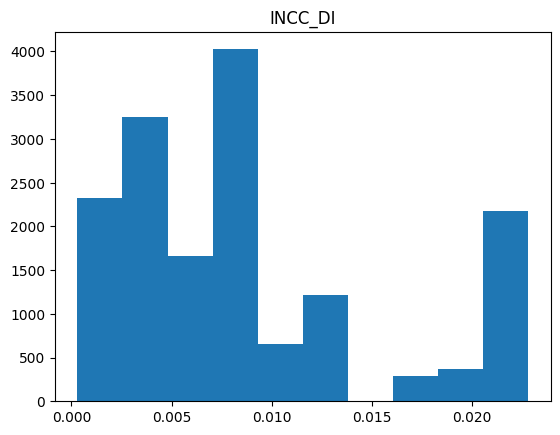

In [ ]:
from seaborn.widgets import color_palette
df.hist("INCC_DI",grid=False)

<Axes: xlabel='Risco', ylabel='INCC_DI'>

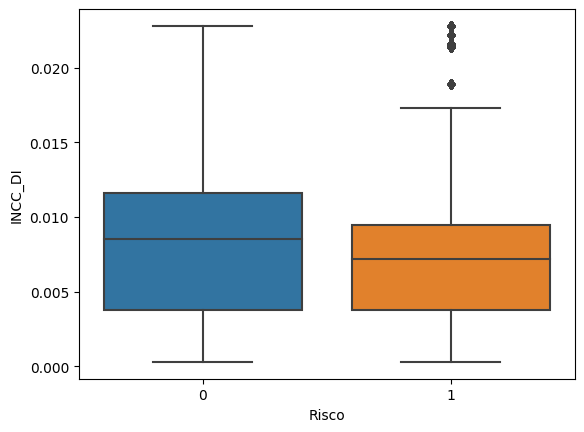

In [ ]:
sns.boxplot(x='Risco',y='INCC_DI',data=df)

Da base analisada, 50% apresenta índice nacional de custo de construção até 0,7% e somente 25% acima de 1,16%.
Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão grande dos valores em relação à média, sendo o menor valor 0,03% e o maior 2,28%

Grupos com maiores indíces nacionais de custo de construção não necessariamente tendem a ser mais arriscados.


## Numero_da_assembleia_geral_ordinária

<Axes: ylabel='Numero_da_assembleia_geral_ordinária'>

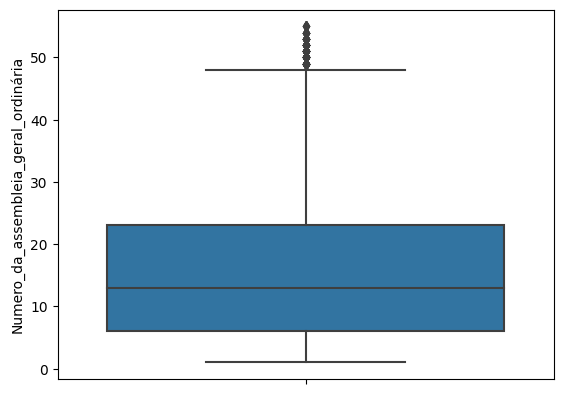

In [ ]:
sns.boxplot(y='Numero_da_assembleia_geral_ordinária',data=df)

array([[<Axes: title={'center': 'Numero_da_assembleia_geral_ordinária'}>]],
      dtype=object)

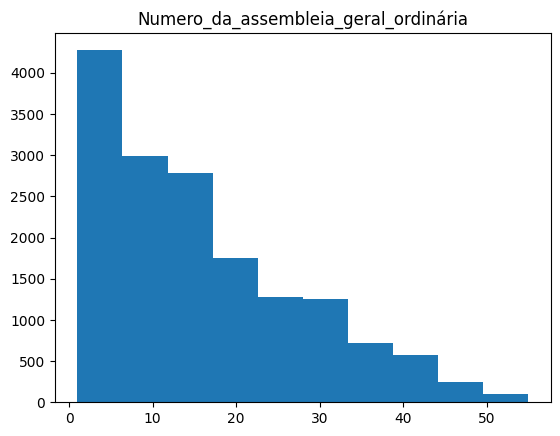

In [ ]:
from seaborn.widgets import color_palette
df.hist("Numero_da_assembleia_geral_ordinária",grid=False)

<Axes: xlabel='Risco', ylabel='Numero_da_assembleia_geral_ordinária'>

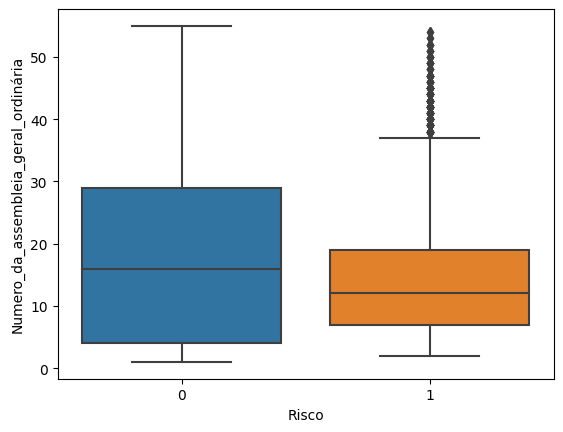

In [ ]:
sns.boxplot(x='Risco',y='Numero_da_assembleia_geral_ordinária',data=df)

Dos grupos presentes na análise, 50% passaram pela 13ª assembléia e somente 25% já passaram da 23ª assembléia.
Tem grupos que estão na 1ª assembléia e grupos mais antigos que já estão na 55ª assembléia.
Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão grande dos valores em relação à média.

Grupos com mais número de assembleias não necessariamente tendem a ter risco maior.


## Valor_medio_do_bem

<Axes: ylabel='Valor_medio_do_bem'>

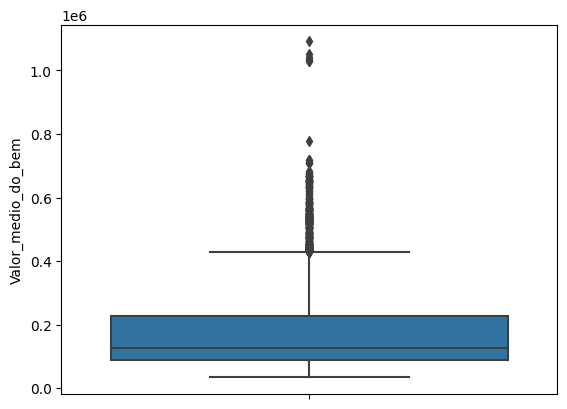

In [ ]:
sns.boxplot(y='Valor_medio_do_bem',data=df)

array([[<Axes: title={'center': 'Valor_medio_do_bem'}>]], dtype=object)

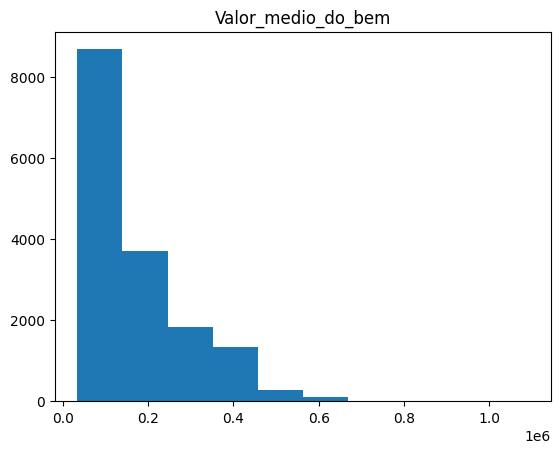

In [ ]:
df.hist("Valor_medio_do_bem",grid=False)

<Axes: xlabel='Risco', ylabel='Valor_medio_do_bem'>

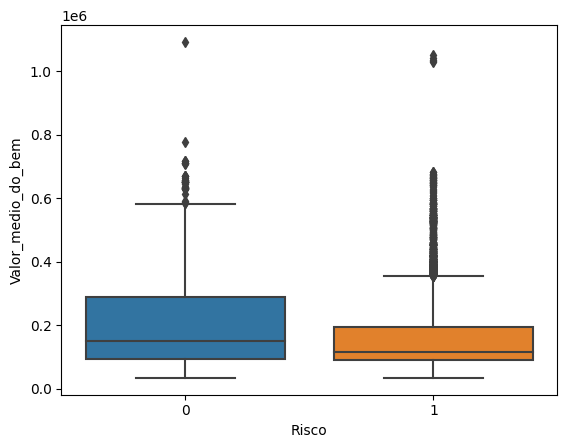

In [ ]:
sns.boxplot(x='Risco',y='Valor_medio_do_bem',data=df)

50% dos valores das cartas de crédito dos grupos avaliados estão concentrados em uma faixa até 126 mil e 25% dos maiores valores, em um faixa acima de 225 mil.A menor carta de crédito apresenta valor de 34 mil e a maior valor de 1,09 milhões. Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão grande dos valores em relação à média.

Grupos com valores maiores do bem não necessariamente tendem a ter um risco maior.


## Taxa_de_administracao

<Axes: ylabel='Taxa_de_administracao'>

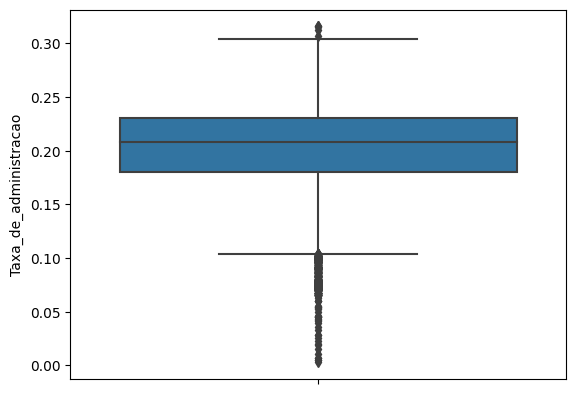

In [ ]:
sns.boxplot(y='Taxa_de_administracao',data=df)

array([[<Axes: title={'center': 'Taxa_de_administracao'}>]], dtype=object)

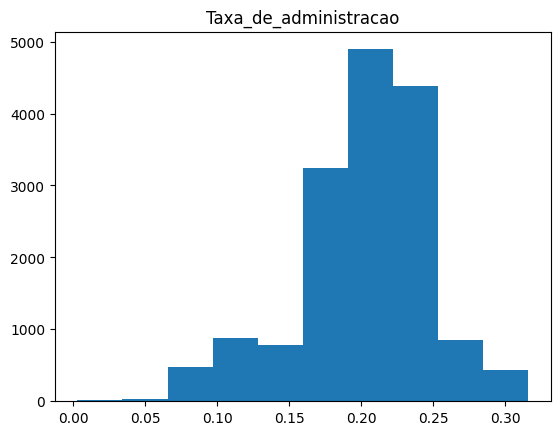

In [ ]:
df.hist("Taxa_de_administracao",grid=False)

<Axes: xlabel='Risco', ylabel='Taxa_de_administracao'>

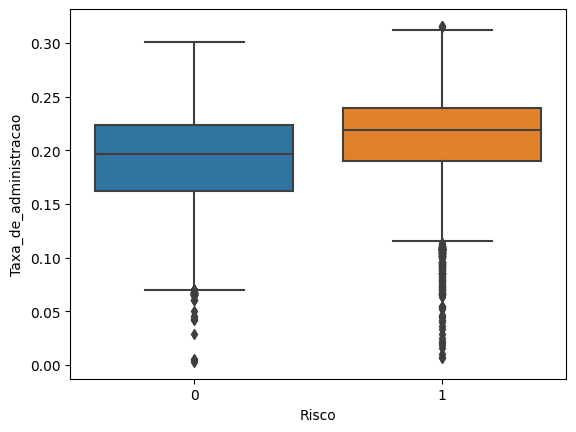

In [ ]:
sns.boxplot(x='Risco',y='Taxa_de_administracao',data=df)

Essa variável apresenta uma distribuição assimétrica à esquerda, com a presença de mais outliers inferiores do que superiores.
50% das taxas de administração dos grupos analisados está acima de 20,81%.
A menor taxa do conjunto de dados é 0,28% e a maior é 31,59%.
A definição da taxa de administração é bastante estratégica para esse produto, pois representa a receita bruta que cada empresa espera obter com a venda do produto. Pode variar bastante em virtude do momento que a empresa está, de seus objetivos, de campanhas, de pressão dos concorrentes, entre outros fatores.

Grupos com taxas maiores de administração tendem a serem mais arriscados.


## Quantidade_de_cotas_ativas_em_dia

<Axes: ylabel='Quantidade_de_cotas_ativas_em_dia'>

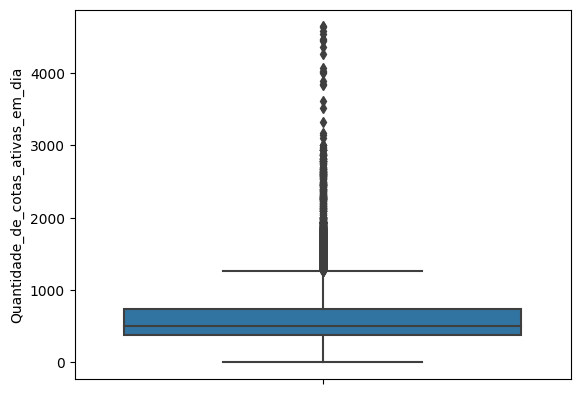

In [ ]:
sns.boxplot(y='Quantidade_de_cotas_ativas_em_dia',data=df)

array([[<Axes: title={'center': 'Quantidade_de_cotas_ativas_em_dia'}>]],
      dtype=object)

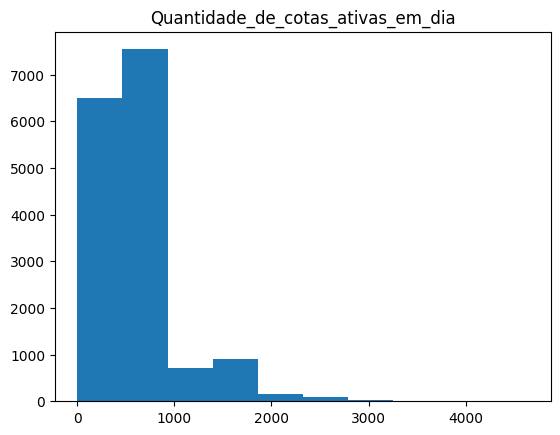

In [ ]:
 df.hist("Quantidade_de_cotas_ativas_em_dia",grid=False)

<Axes: xlabel='Risco', ylabel='Quantidade_de_cotas_ativas_em_dia'>

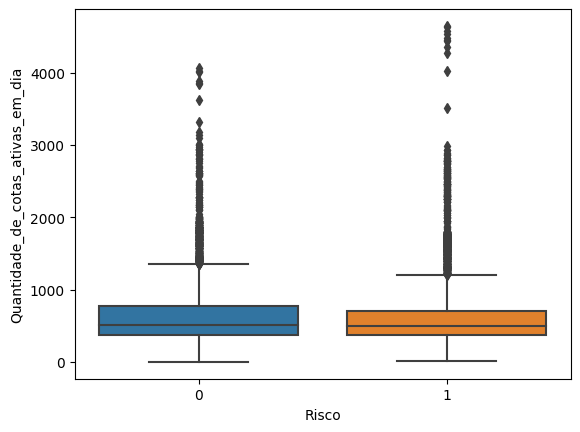

In [ ]:
sns.boxplot(x='Risco',y='Quantidade_de_cotas_ativas_em_dia',data=df)

A quantidade de cotas ativas em dia é muito importante do ponto de vista de sustentabilidade do negócio.
Para os dados avaliados, 50% dos grupos apresentam até 506 cotas ativas em dia e somente 25% tem mais de 735 cotas ativas em dia.Tem grupos apenas com 1 cota ativa em dia (são grupos que acabaram de iniciar as assembléias ordinárias) e grupos com mais de 1,3 mil cotas ativas em dia, isto é, de empresas com maior market share e não necessariamente de grupos no início do contrato, por exemplo, Banco do Brasil e Caixa. Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão grande dos valores em relação à média e bastante outliers superiores.

## Quantidade_de_cotas_ativas_contempladas_inadimplentes

<Axes: ylabel='Quantidade_de_cotas_ativas_contempladas_inadimplentes'>

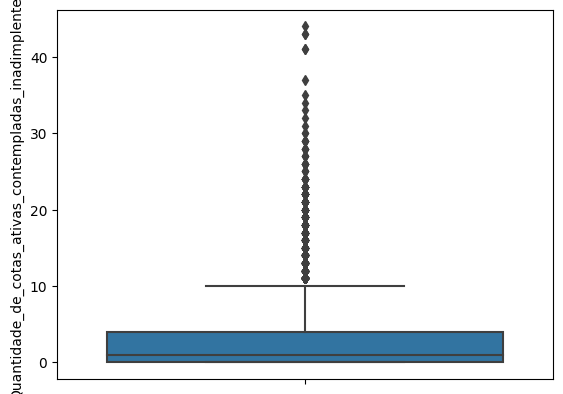

In [ ]:
sns.boxplot(y='Quantidade_de_cotas_ativas_contempladas_inadimplentes',data=df)

array([[<Axes: title={'center': 'Quantidade_de_cotas_ativas_contempladas_inadimplentes'}>]],
      dtype=object)

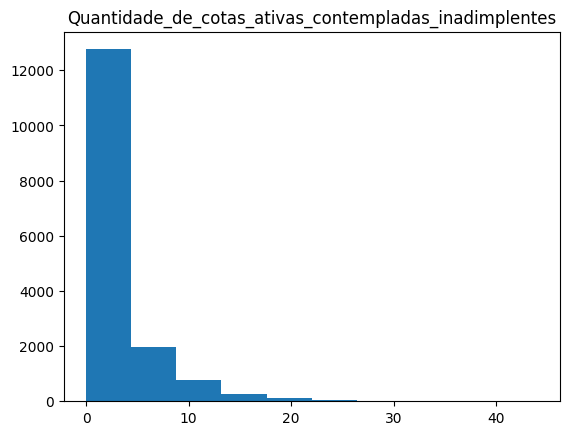

In [ ]:
df.hist("Quantidade_de_cotas_ativas_contempladas_inadimplentes",grid=False)

<Axes: xlabel='Risco', ylabel='Quantidade_de_cotas_ativas_contempladas_inadimplentes'>

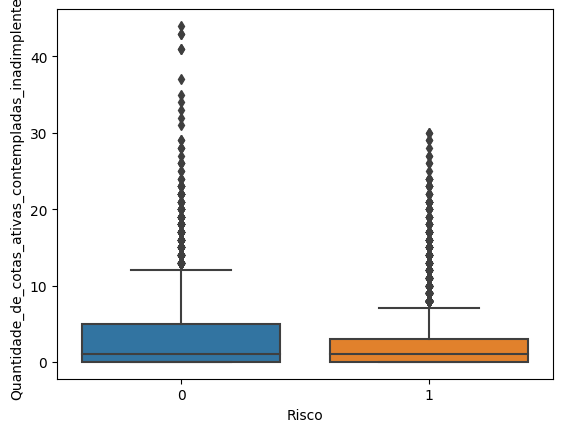

In [ ]:
sns.boxplot(x='Risco',y='Quantidade_de_cotas_ativas_contempladas_inadimplentes',data=df)

A quantidade de cotas ativas contempladas inadimplentes é baixa, sendo de até 1 cota para 50% do dados analisados. Os grupos com mais cotas contempladas inadimplentes possuem 44 cotas. Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão muito grande dos valores em relação à média, com muitos outliers superiores.

## Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes

<Axes: ylabel='Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes'>

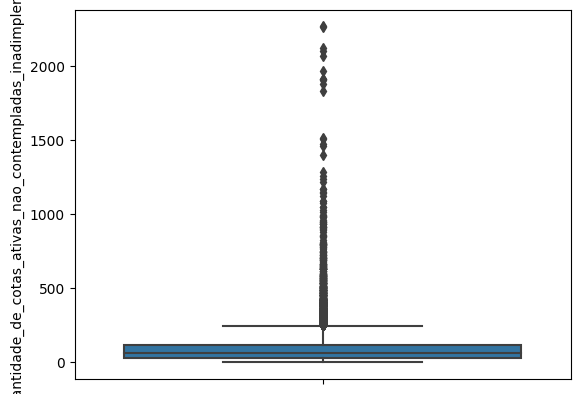

In [ ]:
sns.boxplot(y='Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',data=df)

array([[<Axes: title={'center': 'Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes'}>]],
      dtype=object)

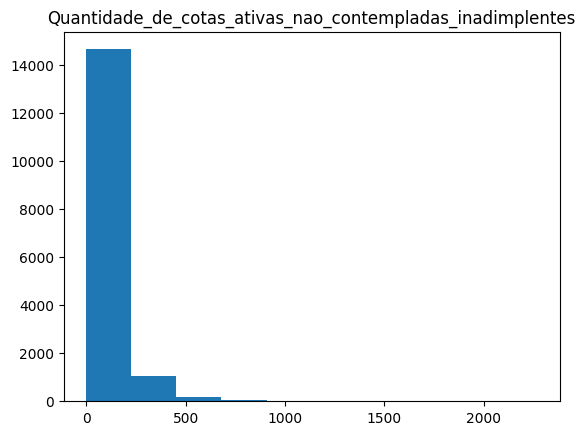

In [ ]:
df.hist("Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes",grid=False)

<Axes: xlabel='Risco', ylabel='Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes'>

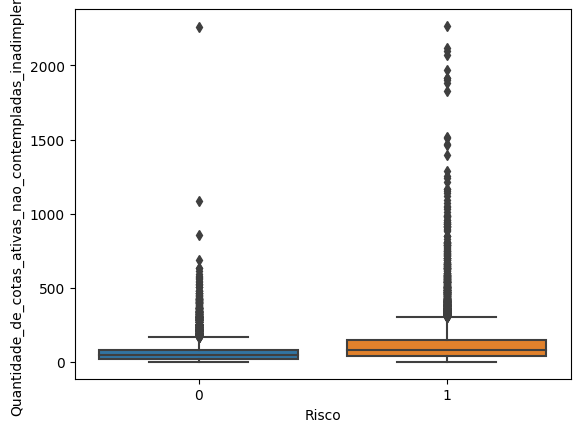

In [ ]:
sns.boxplot(x='Risco',y='Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',data=df)

Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão grande dos valores em relação à média e muitos outliers superiores.
Diferente das cotas ativas contempladas inadimplentes, essa variável apresenta 50% da base com até 62 cotas não contempladas inadimplentes e 25% dos grupos com mais de 118 cotas não contempladas inadimplentes. Observamos maior quantidade de cotas inadimplentes em grupos não contemplados.

## Quantidade_de_cotas_ativas_contempladas_no_mes

<Axes: ylabel='Quantidade_de_cotas_ativas_contempladas_no_mes'>

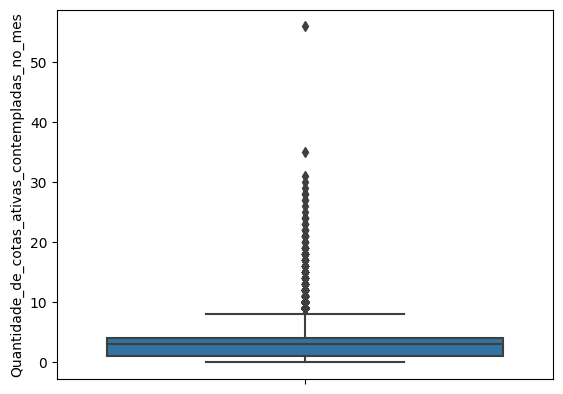

In [ ]:
sns.boxplot(y='Quantidade_de_cotas_ativas_contempladas_no_mes',data=df)

array([[<Axes: title={'center': 'Quantidade_de_cotas_ativas_contempladas_no_mes'}>]],
      dtype=object)

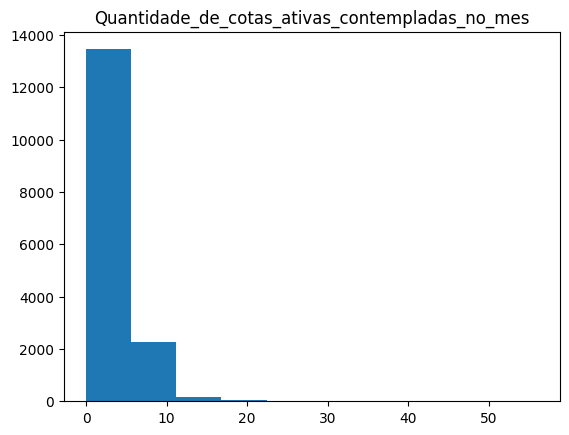

In [ ]:
df.hist("Quantidade_de_cotas_ativas_contempladas_no_mes",grid=False)

<Axes: xlabel='Risco', ylabel='Quantidade_de_cotas_ativas_contempladas_no_mes'>

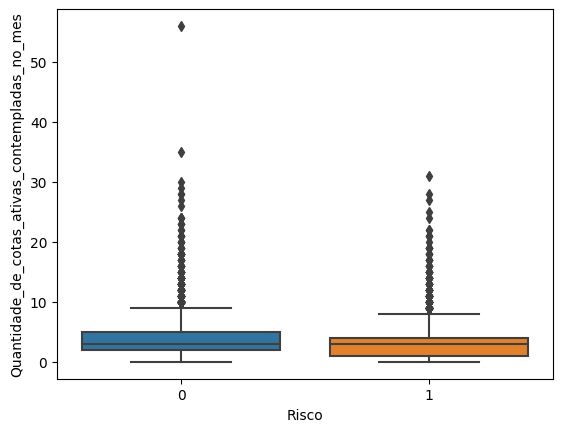

In [ ]:
sns.boxplot(x='Risco',y='Quantidade_de_cotas_ativas_contempladas_no_mes',data=df)

Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão grande dos valores em relação à média e muitos outliers superiores, sendo o maior de 56 cotas ativas contempladas em um mês, muito provavelmente por conta de alguma campanha em um grupo com prazos menores e valores mais baixos de imóveis.

## Quantidade_de_cotas_excluidas

<Axes: ylabel='Quantidade_de_cotas_excluidas'>

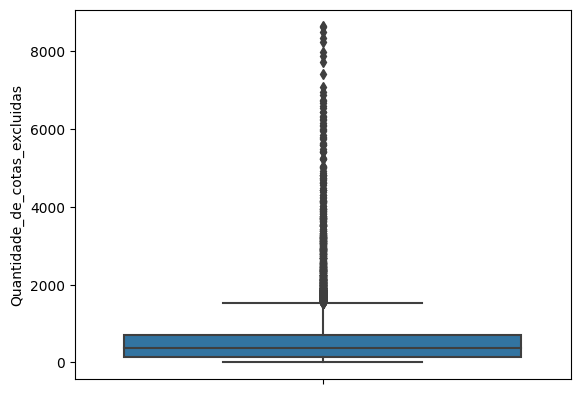

In [ ]:
sns.boxplot(y='Quantidade_de_cotas_excluidas',data=df)

array([[<Axes: title={'center': 'Quantidade_de_cotas_excluidas'}>]],
      dtype=object)

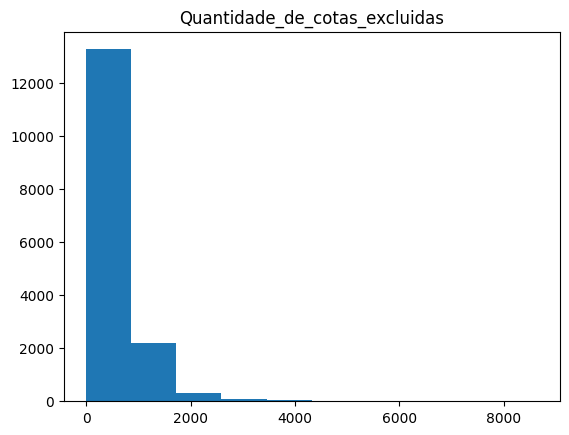

In [ ]:
df.hist("Quantidade_de_cotas_excluidas",grid=False)

<Axes: xlabel='Risco', ylabel='Quantidade_de_cotas_excluidas'>

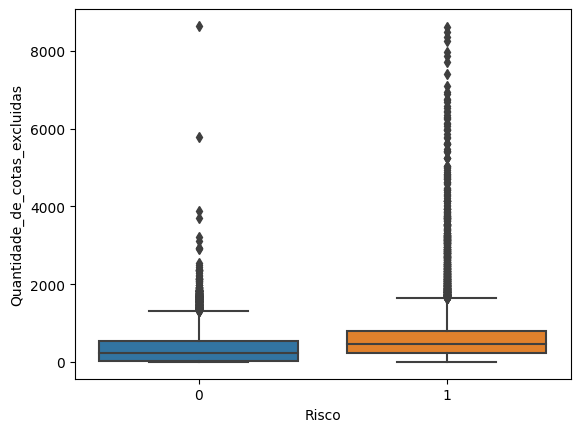

In [ ]:
sns.boxplot(x='Risco',y='Quantidade_de_cotas_excluidas',data=df)

Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão grande dos valores em relação à média e muitos outliers superiores.
50% dos dados de cotas excluídas estão abaixo de 366 cotas, sendo que em 25% dos dados, os valores são maiores do que 694 cotas, chegando em alguns casos em mais de 8.500 cotas excluídas.

Grupos com mais quantidade de cotas excluídas e maiores variações de cotas excluídas tendem a serem mais arriscados.


## Quantidade_de_cotas_ativas_quitadas

<Axes: ylabel='Quantidade_de_cotas_ativas_quitadas'>

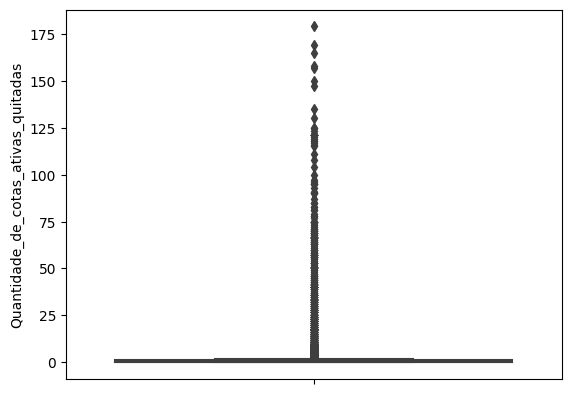

In [ ]:
sns.boxplot(y='Quantidade_de_cotas_ativas_quitadas',data=df)

array([[<Axes: title={'center': 'Quantidade_de_cotas_ativas_quitadas'}>]],
      dtype=object)

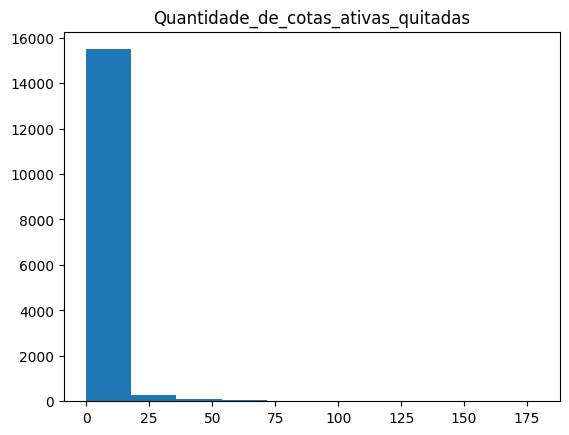

In [ ]:
df.hist("Quantidade_de_cotas_ativas_quitadas",grid=False)

<Axes: xlabel='Risco', ylabel='Quantidade_de_cotas_ativas_quitadas'>

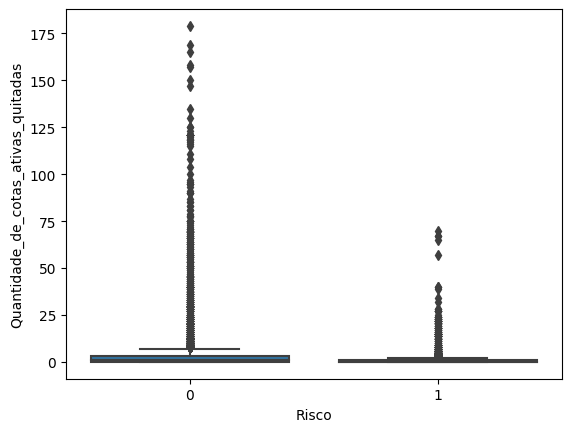

In [ ]:
sns.boxplot(x='Risco',y='Quantidade_de_cotas_ativas_quitadas',data=df)

Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão enorme dos valores em relação à média, muito provavelmente por conta dos outliers superiores.
50% dos dados apresentam nenhuma cota ativa quitada, o que pode ser explicado pela idade dos grupos presentes na base (iniciados em 2018) e pelos prazos contratados de imóveis que normalmente são longos.

## Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao

<Axes: ylabel='Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao'>

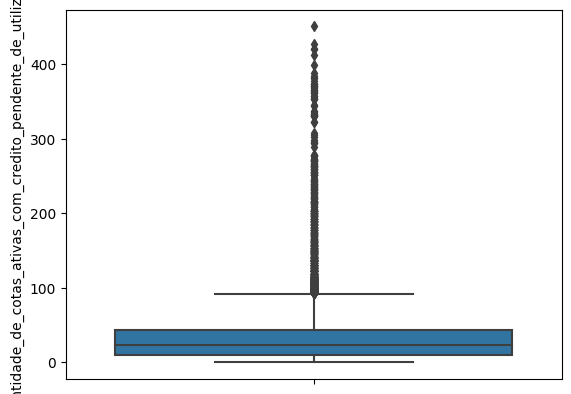

In [ ]:
sns.boxplot(y='Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao',data=df)

array([[<Axes: title={'center': 'Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao'}>]],
      dtype=object)

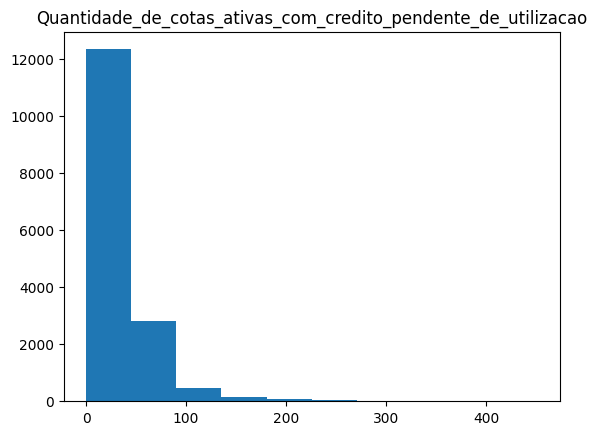

In [ ]:
df.hist("Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao",grid=False)

<Axes: xlabel='Risco', ylabel='Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao'>

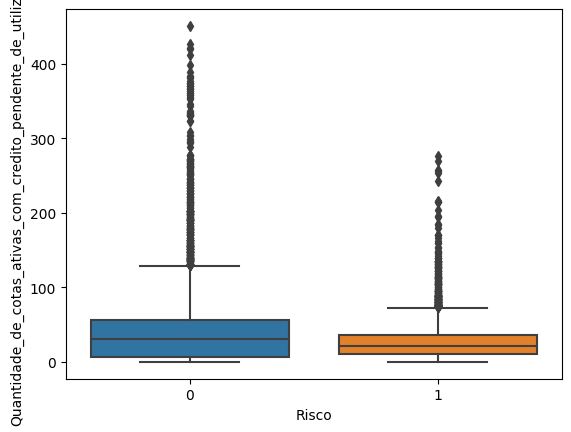

In [ ]:
sns.boxplot(x='Risco',y='Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao',data=df)

Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão enorme dos valores em relação à média, muito provavelmente por conta dos outliers superiores.
75% da base avaliada apresenta até 43 cotas ativas com crédito disponível para utilização de seus clientes e somente 25% apresentam uma quantidade superior a 43 cotas, chegando a grupos com 451 cotas disponíveis.

## Carteira_ativa

<Axes: ylabel='Carteira_ativa'>

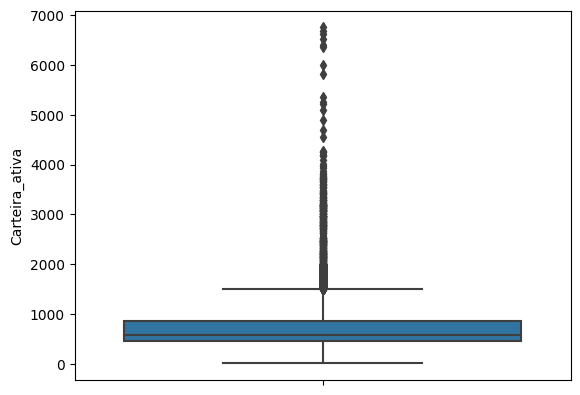

In [ ]:
sns.boxplot(y='Carteira_ativa',data=df)

array([[<Axes: title={'center': 'Carteira_ativa'}>]], dtype=object)

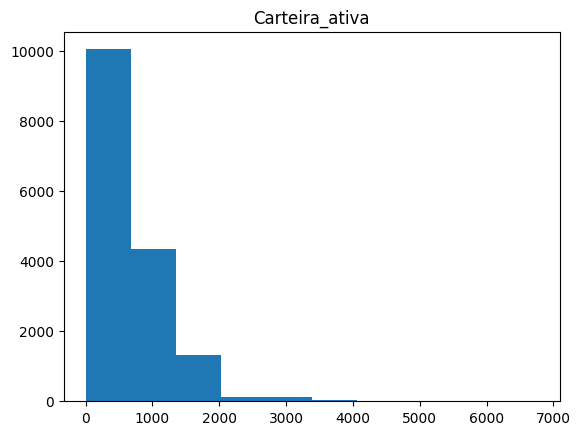

In [ ]:
df.hist("Carteira_ativa",grid=False)

<Axes: xlabel='Risco', ylabel='Carteira_ativa'>

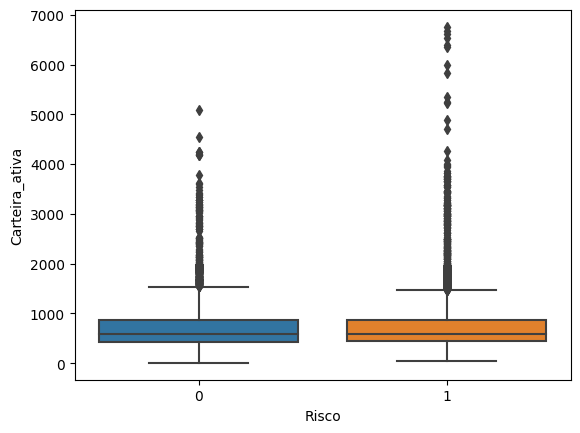

In [ ]:
sns.boxplot(x='Risco',y='Carteira_ativa',data=df)

Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão grande dos valores em relação à média e a presença de muitos outliers superiores.
75% da carteira ativa dos grupos analisados possuem até 866 cotas, sendo que existem grupos com mais de 6.500 cotas ativas. Essa variável parece indicar que existem grupos de empresas com grande participação de mercado nesse segmento.

## Carteira_inadimplente

<Axes: ylabel='Carteira_inadimplente'>

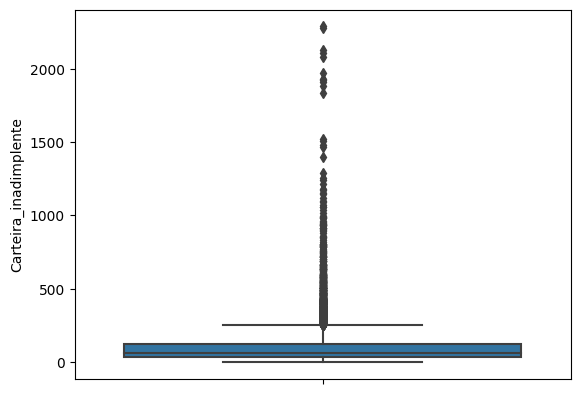

In [ ]:
sns.boxplot(y='Carteira_inadimplente',data=df)

array([[<Axes: title={'center': 'Carteira_inadimplente'}>]], dtype=object)

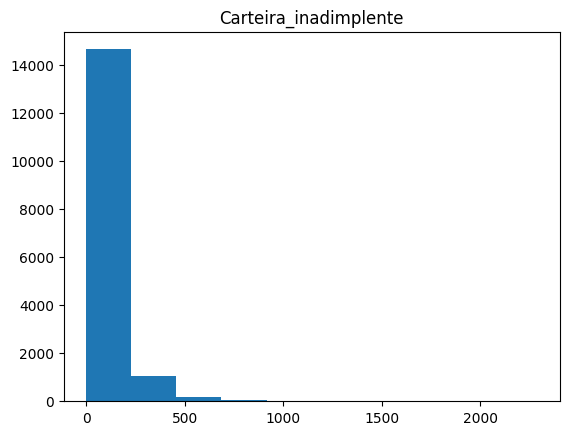

In [ ]:
df.hist("Carteira_inadimplente",grid=False)

<Axes: xlabel='Risco', ylabel='Carteira_inadimplente'>

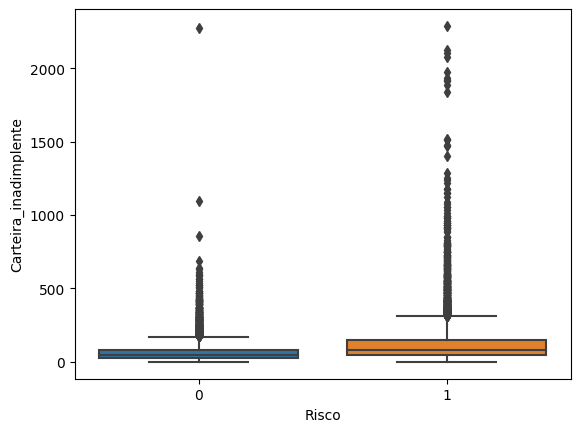

In [ ]:
sns.boxplot(x='Risco',y='Carteira_inadimplente',data=df)

Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão grande dos valores em relação à média e a presença de muitos outliers superiores.
A média da carteira inadimplente da base analisada é de 98 cotas.
75% da carteira inadimplente dos grupos analisados possuem até 122 cotas, sendo que existem grupos com mais de 2.200 cotas inadimplentes.

Grupos com mais tempo decorrido (idade) e valores de parcelas maiores não necessariamente tendem a apresentar risco alto. Ao passo que grupos com carteira inadimplente maior tendem a apresentar risco maior.


## Parcela

<Axes: ylabel='Parcela'>

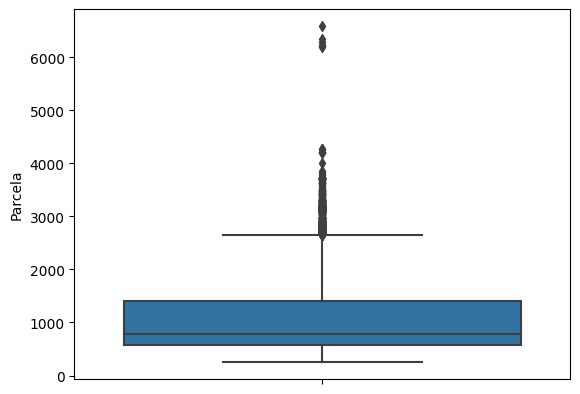

In [ ]:
sns.boxplot(y='Parcela',data=df)

array([[<Axes: title={'center': 'Parcela'}>]], dtype=object)

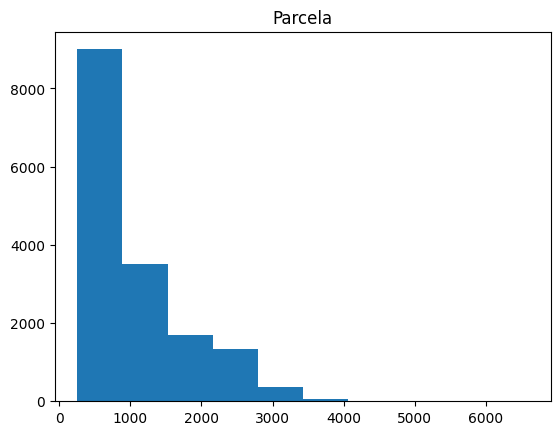

In [ ]:
df.hist("Parcela",grid=False)

<Axes: xlabel='Risco', ylabel='Parcela'>

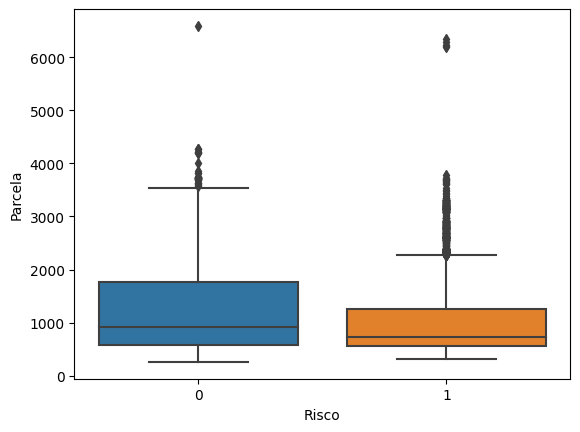

In [ ]:
sns.boxplot(x='Risco',y='Parcela',data=df)

50% dos valores das parcelas para adquirir imóveis encontra-se até 787, tendo o valor mínimo de 256. Somente 25% dos valores são superiores a 1.400, podendo alcançar até 6.594, dependendo do imóvel desejado. Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão grande dos valores em relação à média.

Grupos com mais tempo decorrido (idade) e valores de parcelas maiores não necessariamente tendem a apresentar risco alto. Ao passo que grupos com carteira inadimplente maior tendem a apresentar risco maior.


## Idade

<Axes: ylabel='Idade'>

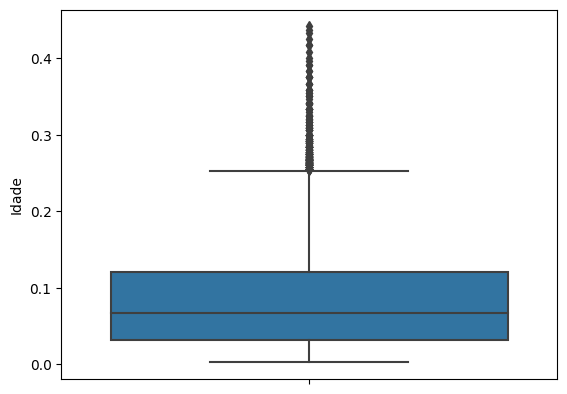

In [ ]:
sns.boxplot(y='Idade',data=df)

array([[<Axes: title={'center': 'Idade'}>]], dtype=object)

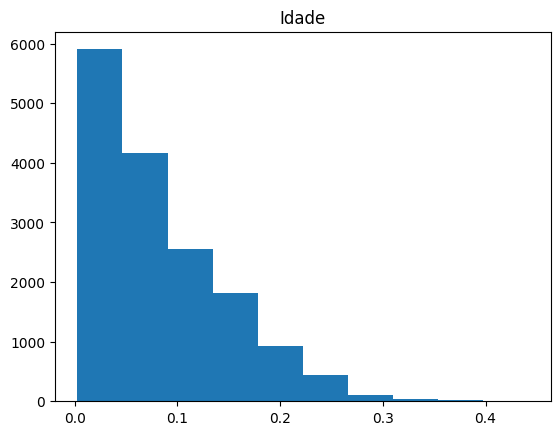

In [ ]:
df.hist("Idade",grid=False)

<Axes: xlabel='Risco', ylabel='Idade'>

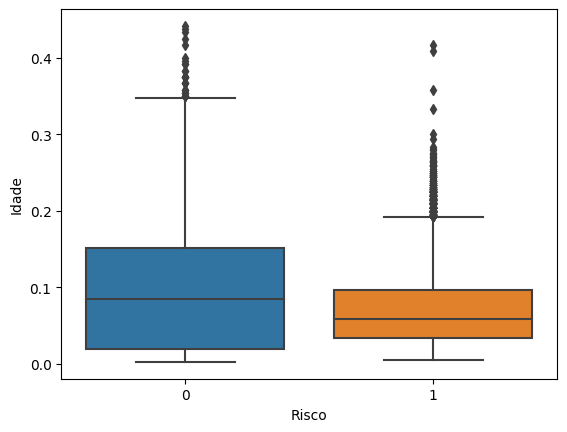

In [ ]:
sns.boxplot(x='Risco',y='Idade',data=df)

50% dos grupos avaliados ja cumpriram até 6,67% da idade planejada.
O grupo mais jovem da base apresenta 0,25% de cumprimento do plano estipulado para o grupo e o mais velho apresenta 44,17%. Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão grande dos valores em relação à média.

Grupos com mais tempo decorrido (idade) e valores de parcelas maiores não necessariamente tendem a apresentar risco alto. Ao passo que grupos com carteira inadimplente maior tendem a apresentar risco maior.


## Var_cotas_Excluidas

<Axes: ylabel='Var_cotas_Excluidas'>

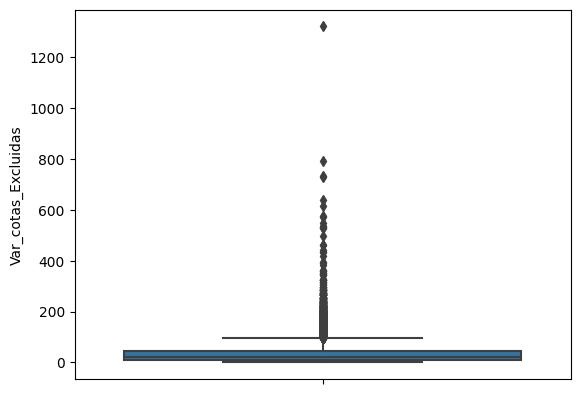

In [ ]:
sns.boxplot(y='Var_cotas_Excluidas',data=df)

array([[<Axes: title={'center': 'Var_cotas_Excluidas'}>]], dtype=object)

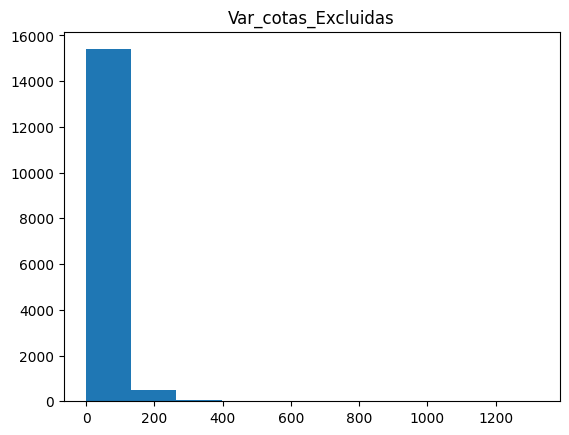

In [ ]:
df.hist("Var_cotas_Excluidas",grid=False)

<Axes: xlabel='Risco', ylabel='Var_cotas_Excluidas'>

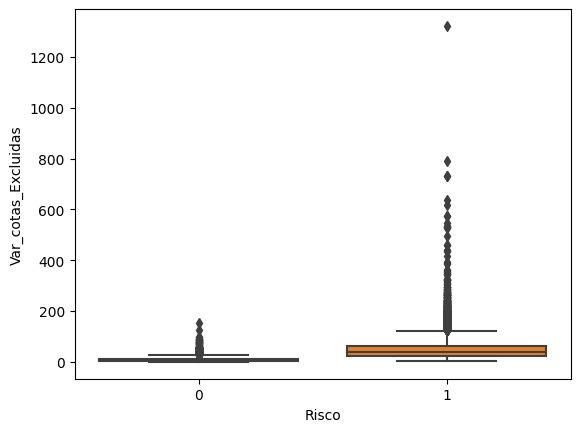

In [ ]:
sns.boxplot(x='Risco',y='Var_cotas_Excluidas',data=df)

Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão grande dos valores em relação à média e com muitos outliers superiores.Enquanto alguns grupos apresentaram em alguns períodos variação nula de cotas excluídas, outros chegaram a patamares de mais de 1300 cotas. A média da variação de cotas excluídas da base é de 33 cotas!

Grupos com mais quantidade de cotas excluídas e maiores variações de cotas excluídas tendem a serem mais arriscados.


## Perc_churn

<Axes: ylabel='Perc_churn'>

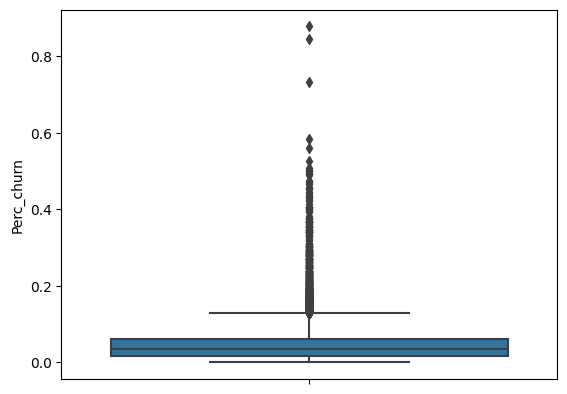

In [ ]:
sns.boxplot(y='Perc_churn',data=df)

array([[<Axes: title={'center': 'Perc_churn'}>]], dtype=object)

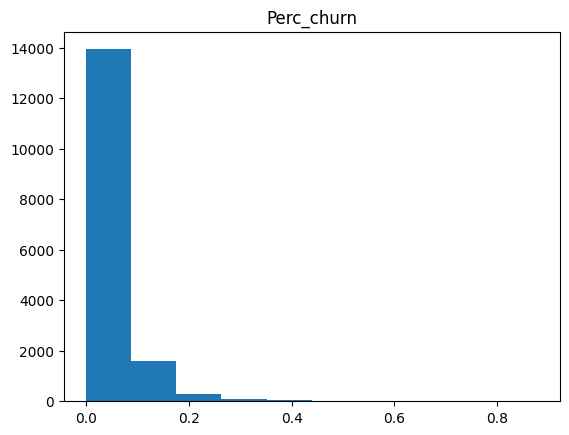

In [ ]:
df.hist("Perc_churn",grid=False)

<Axes: xlabel='Risco', ylabel='Perc_churn'>

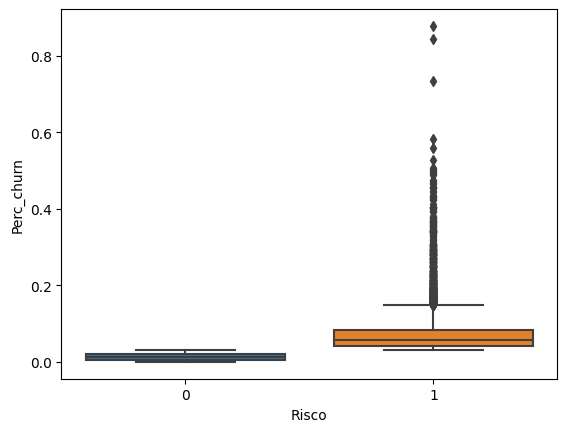

In [ ]:
sns.boxplot(x='Risco',y='Perc_churn',data=df)

Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão grande dos valores em relação à média.
50% dos percentuais de churn estão até 3,43%. Somente 25% dos valores estão acima de 6,1%, sendo o valor máximo de 87,78%

Grupos com percentuais de churn e de inadimplência mais elevados tendem a ter risco alto.



## Perc_inadimplencia

<Axes: ylabel='Perc_inadimplencia'>

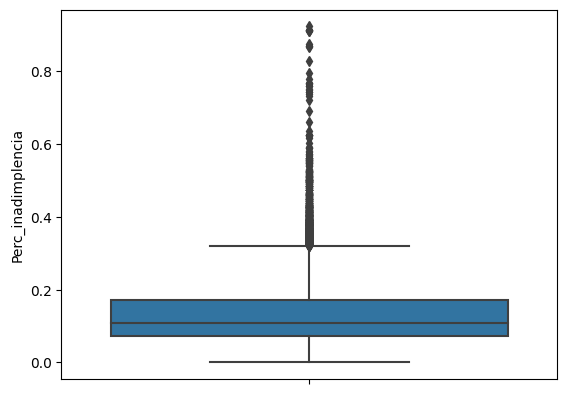

In [ ]:
sns.boxplot(y='Perc_inadimplencia',data=df)

array([[<Axes: title={'center': 'Perc_inadimplencia'}>]], dtype=object)

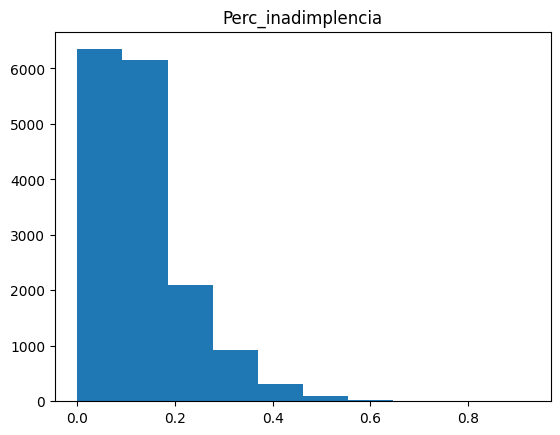

In [ ]:
df.hist("Perc_inadimplencia",grid=False)

<Axes: xlabel='Risco', ylabel='Perc_inadimplencia'>

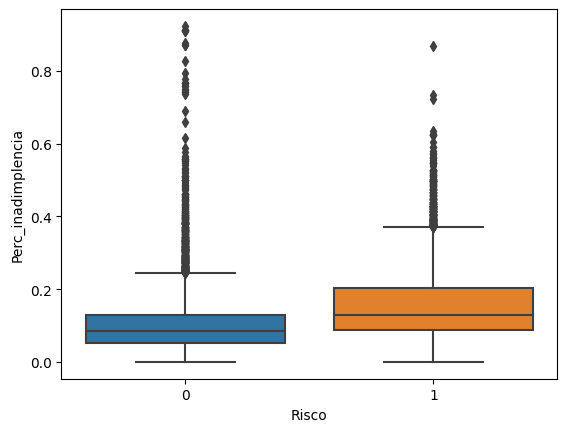

In [ ]:
sns.boxplot(x='Risco',y='Perc_inadimplencia',data=df)

50% da base apresenta uma carteira inadimplente de até 10,81%.
25% apresenta uma carteira inadimplente superior a 17%, sendo o valor máximo 92,31%.
Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão grande dos valores em relação à média.


## Receita_potencial

<Axes: ylabel='Receita_potencial'>

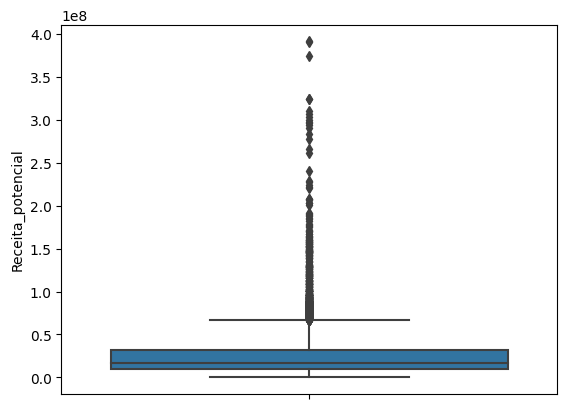

In [ ]:
sns.boxplot(y='Receita_potencial',data=df)

array([[<Axes: title={'center': 'Receita_potencial'}>]], dtype=object)

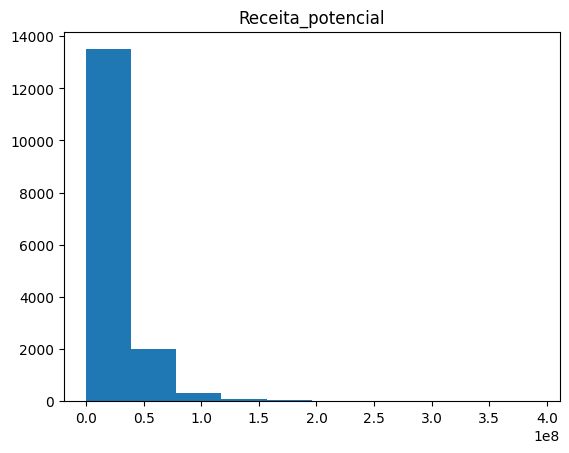

In [ ]:
df.hist("Receita_potencial",grid=False)

<Axes: xlabel='Risco', ylabel='Receita_potencial'>

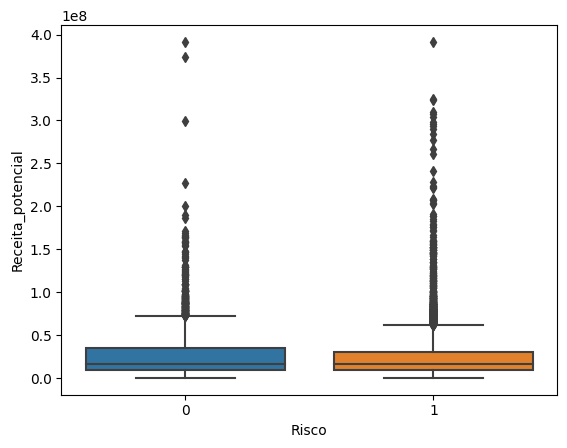

In [ ]:
sns.boxplot(x='Risco',y='Receita_potencial',data=df)

50% dos valores de receita potencial estão até 16,69 milhões.
Somente 25% ds valores estão acima de 32,3 milhões, sendo o maior valor de  391,4 milhões.
Essa variável apresenta uma distribuição assimétrica à direita, com uma dispersão grande dos valores em relação à média.


# Cálculo do Coeficiente de Correlação Linear de Pearson

In [ ]:
df[num_vars].corr()

,Prazo_do_grupo_em_meses,INCC_DI,Numero_da_assembleia_geral_ordinária,Valor_medio_do_bem,Taxa_de_administracao,Quantidade_de_cotas_ativas_em_dia,Quantidade_de_cotas_ativas_contempladas_inadimplentes,Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes,Quantidade_de_cotas_ativas_contempladas_no_mes,Quantidade_de_cotas_excluidas,Quantidade_de_cotas_ativas_quitadas,Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao,Carteira_ativa,Carteira_inadimplente,Parcela,Idade,Var_cotas_Excluidas,Perc_churn,Perc_inadimplencia,Receita_potencial
Prazo_do_grupo_em_meses,1.0000,-0.0001,-0.0660,0.1360,0.2232,0.0879,-0.1295,0.1649,-0.1059,0.0368,-0.3394,-0.1254,0.1130,0.1600,-0.0957,-0.2587,0.1006,0.0870,0.0765,0.2023
INCC_DI,-0.0001,1.0000,0.1271,0.0159,0.0104,0.0458,0.0803,-0.0095,0.0631,0.0861,0.0431,0.0880,0.0372,-0.0069,0.0145,0.1226,-0.0032,-0.0226,-0.0412,0.0353
Numero_da_assembleia_geral_ordinária,-0.0660,0.1271,1.0000,0.0833,-0.0330,-0.1058,0.6025,-0.1329,0.1234,0.4590,0.3023,0.4966,-0.1169,-0.1131,0.1079,0.9630,-0.1590,-0.1707,-0.0759,-0.0147
Valor_medio_do_bem,0.1360,0.0159,0.0833,1.0000,-0.2510,-0.0418,0.0374,-0.0541,0.0090,-0.0497,-0.0173,-0.0191,-0.0481,-0.0527,0.9623,0.0672,-0.0760,-0.0921,-0.0237,0.6003
Taxa_de_administracao,0.2232,0.0104,-0.0330,-0.2510,1.0000,-0.0892,-0.1277,0.0879,-0.3381,0.0909,-0.2554,-0.2741,-0.0556,0.0835,-0.2650,-0.1063,0.1134,0.2074,0.1288,0.0299
Quantidade_de_cotas_ativas_em_dia,0.0879,0.0458,-0.1058,-0.0418,-0.0892,1.0000,0.1007,0.5441,0.4944,0.2783,0.1140,0.4113,0.9795,0.5450,-0.0814,-0.1208,0.4271,-0.0632,-0.0924,0.5793
Quantidade_de_cotas_ativas_contempladas_inadimplentes,-0.1295,0.0803,0.6025,0.0374,-0.1277,0.1007,1.0000,0.1192,0.2094,0.5328,0.4015,0.4740,0.1216,0.1506,0.0801,0.6340,0.0676,-0.0422,0.1790,0.0768
Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes,0.1649,-0.0095,-0.1329,-0.0541,0.0879,0.5441,0.1192,1.0000,0.1998,0.3751,-0.0830,0.0575,0.7018,0.9995,-0.0891,-0.1604,0.6579,0.2063,0.5793,0.4432
Quantidade_de_cotas_ativas_contempladas_no_mes,-0.1059,0.0631,0.1234,0.0090,-0.3381,0.4944,0.2094,0.1998,1.0000,0.2634,0.2271,0.5681,0.4689,0.2056,-0.0018,0.1326,0.1531,-0.1128,-0.1500,0.2297
Quantidade_de_cotas_excluidas,0.0368,0.0861,0.4590,-0.0497,0.0909,0.2783,0.5328,0.3751,0.2634,1.0000,0.0616,0.3668,0.3299,0.3905,-0.0624,0.4087,0.4247,0.2200,0.1712,0.2135


<Axes: >

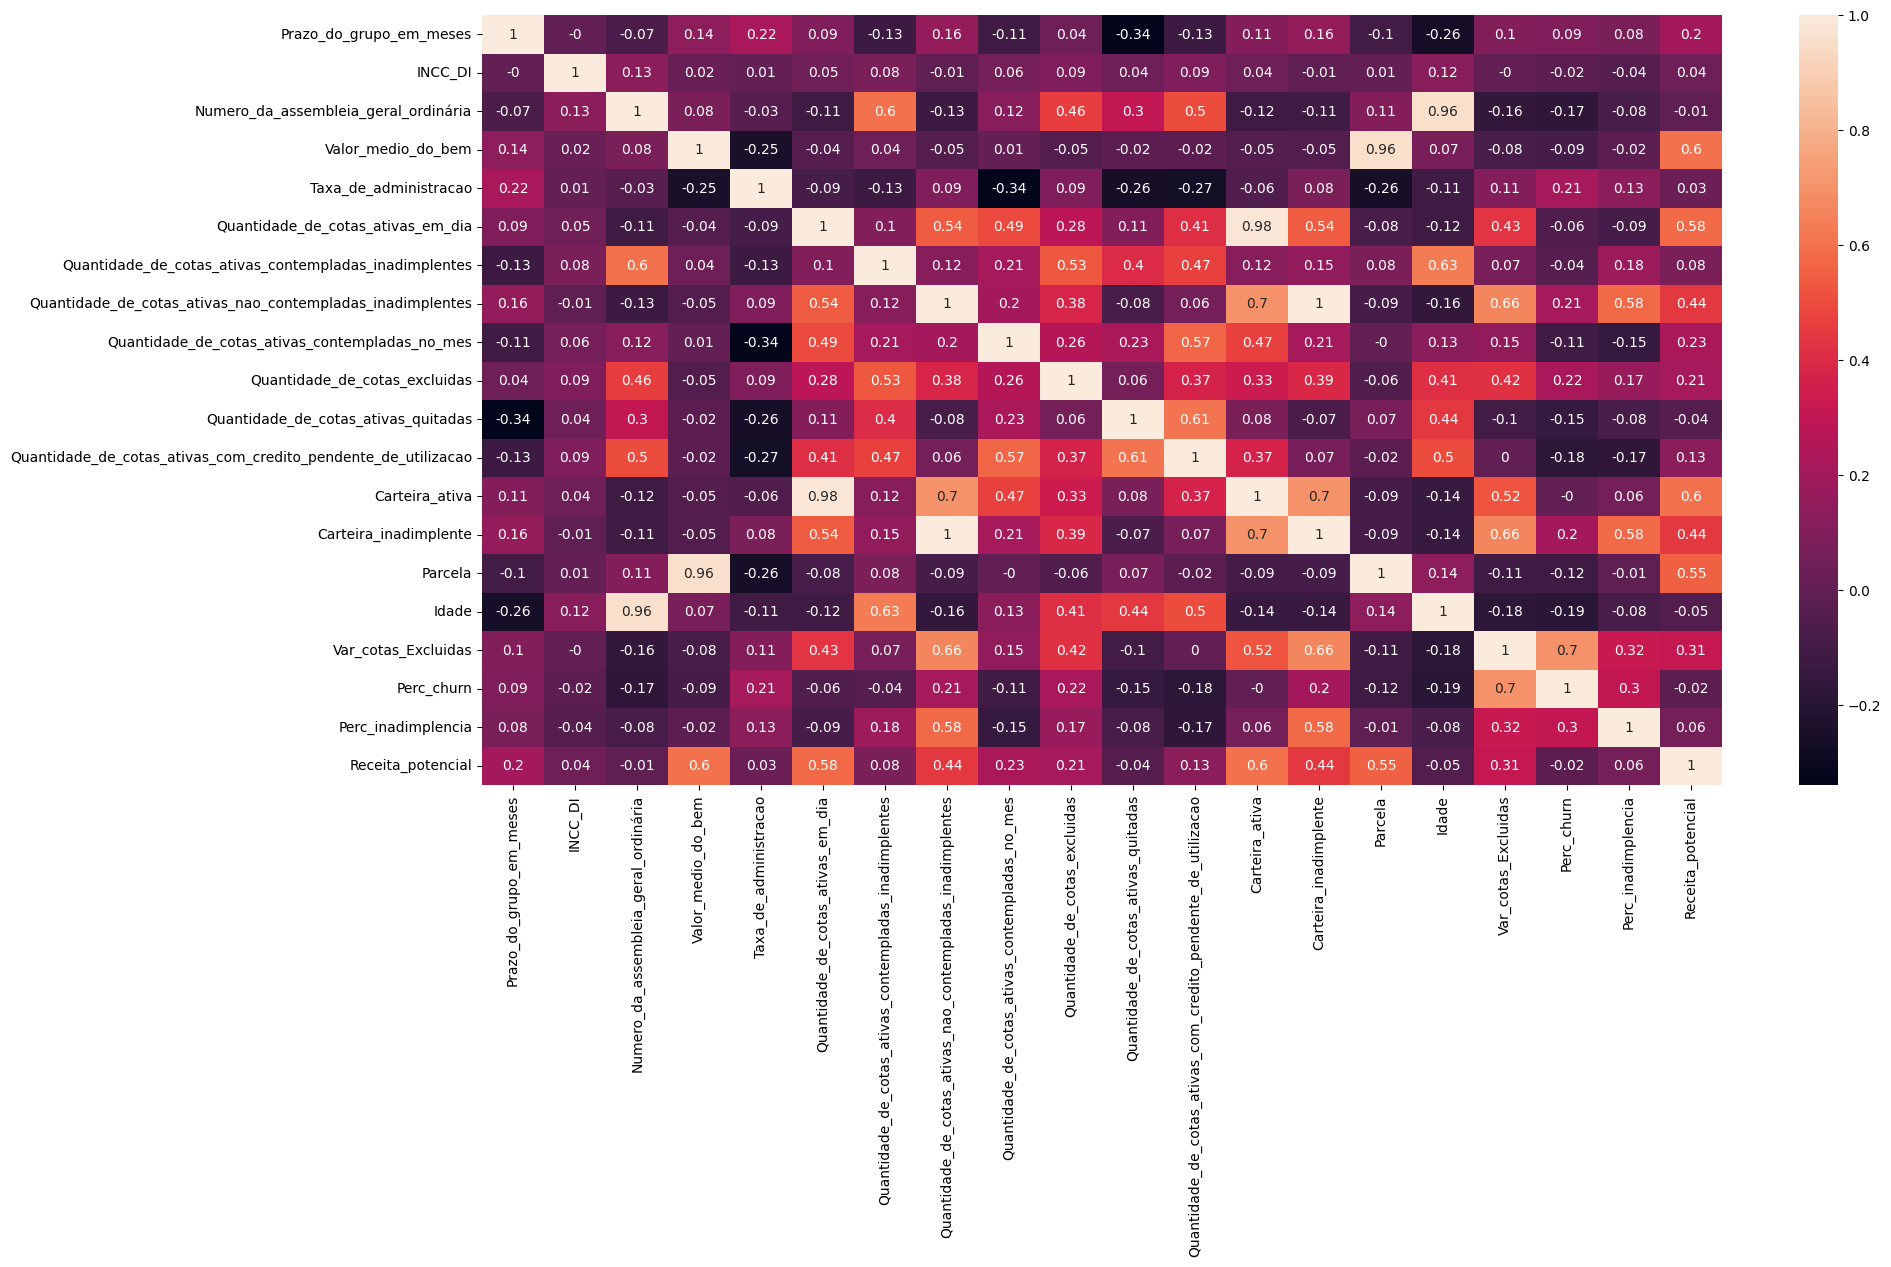

In [ ]:
#mapa de calor das correlações das variáveis numéricas
plt.figure(figsize=(20,10))
correl = df[num_vars].corr().round(2)
sns.heatmap(correl,
            xticklabels = correl.columns.values,
            yticklabels = correl.columns.values,
            annot=True)

As variáveis Carteira Ativa, Carteira Inadimplente, Parcela e Idade apresentaram correlação alta com as variáveis Quantidade de cotas ativas em dia, Quantidade de cotas ativas não contempladas inadimplentes, valor médio do bem e número de assembleia geral ordinária, respectivamente, muito provavelmente por conta que foram construídas em função das demais variáveis.

Apesar de saber que variáveis com alta correlação entre si podem impactar os modelos (devido à multicolinearidade), inicialmente não retiraremos nenhuma variável, para obter como cada modelo se comporta com as variáveis da base,e posteriormente, vamos retirar uma a uma, para observar os impactos.


# Verificação da existência de correlação maior que o número mágico estatístico 0.7 entre as variáveis.

In [ ]:
(df[num_vars].corr() > 0.7).sum()

Prazo_do_grupo_em_meses                                          1
INCC_DI                                                          1
Numero_da_assembleia_geral_ordinária                             2
Valor_medio_do_bem                                               2
Taxa_de_administracao                                            1
Quantidade_de_cotas_ativas_em_dia                                2
Quantidade_de_cotas_ativas_contempladas_inadimplentes            1
Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes        3
Quantidade_de_cotas_ativas_contempladas_no_mes                   1
Quantidade_de_cotas_excluidas                                    1
Quantidade_de_cotas_ativas_quitadas                              1
Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao    1
Carteira_ativa                                                   4
Carteira_inadimplente                                            3
Parcela                                                       

In [ ]:
# Variáveis numéricas 20
# tirar as variáveis com alta correlação (logistica lin 4 a 10)
num_vars = ['Prazo_do_grupo_em_meses',
            #'INCC_DI',
            #'Numero_da_assembleia_geral_ordinária',
            #'Carteira_ativa',
            #'Carteira_inadimplente',
            #'Parcela',
            #'Var_cotas_Excluidas',
            #'Perc_churn',
            'Valor_medio_do_bem',
            'Taxa_de_administracao',
            'Quantidade_de_cotas_ativas_em_dia',
            'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
            'Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',
            'Quantidade_de_cotas_ativas_contempladas_no_mes',
            #'Quantidade_de_cotas_excluidas',
            'Quantidade_de_cotas_ativas_quitadas',
            'Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao',
            'Idade',
            'Perc_inadimplencia',
            'Receita_potencial']

# Covariância:

Mede quanto duas variáveis aleatórias variam juntas.É similar a variância (enquanto a variância mostra quanto uma variável sozinha varia, a covariância revela como duas variáveis variam juntas.

Quando a covariância é positiva, as variáveis tendem a mostrar comportamentos semelhantes e quando é negativa, as variáveis tendem a mostrar comportamentos opostos.


In [ ]:
df[num_vars].cov().round(2)

,Prazo_do_grupo_em_meses,Valor_medio_do_bem,Taxa_de_administracao,Quantidade_de_cotas_ativas_em_dia,Quantidade_de_cotas_ativas_contempladas_inadimplentes,Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes,Quantidade_de_cotas_ativas_contempladas_no_mes,Quantidade_de_cotas_ativas_quitadas,Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao,Idade,Perc_inadimplencia,Receita_potencial
Prazo_do_grupo_em_meses,680.7100,416244.2400,0.2700,995.3700,-13.2500,525.9800,-7.6200,-82.7600,-123.6800,-0.4400,0.2000,125631453.3000
Valor_medio_do_bem,416244.2400,13766949851.8400,-1358.0800,-2126932.7500,17185.4900,-776138.4100,2926.9700,-18965.6700,-84621.7200,513.7200,-272.6200,1676418178541.4299
Taxa_de_administracao,0.2700,-1358.0800,0.0000,-1.7800,-0.0200,0.5000,-0.0400,-0.1100,-0.4800,-0.0000,0.0000,32804.5200
Quantidade_de_cotas_ativas_em_dia,995.3700,-2126932.7500,-1.7800,188344.4300,171.2200,28872.2700,591.4800,462.3100,6746.4700,-3.4200,-3.9300,5984437920.8200
Quantidade_de_cotas_ativas_contempladas_inadimplentes,-13.2500,17185.4900,-0.0200,171.2200,15.3600,57.1100,2.2600,14.7100,70.2100,0.1600,0.0700,7168629.8300
Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes,525.9800,-776138.4100,0.5000,28872.2700,57.1100,14950.9600,67.3500,-94.8200,265.9500,-1.2800,6.9500,1289743413.7200
Quantidade_de_cotas_ativas_contempladas_no_mes,-7.6200,2926.9700,-0.0400,591.4800,2.2600,67.3500,7.6000,5.8500,59.1900,0.0200,-0.0400,15071066.1600
Quantidade_de_cotas_ativas_quitadas,-82.7600,-18965.6700,-0.1100,462.3100,14.7100,-94.8200,5.8500,87.3500,214.4700,0.2700,-0.0800,-8459235.3500
Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao,-123.6800,-84621.7200,-0.4800,6746.4700,70.2100,265.9500,59.1900,214.4700,1428.4700,1.2300,-0.6400,118026722.4100
Idade,-0.4400,513.7200,-0.0000,-3.4200,0.1600,-1.2800,0.0200,0.2700,1.2300,0.0000,-0.0000,-83633.0300


<Axes: >

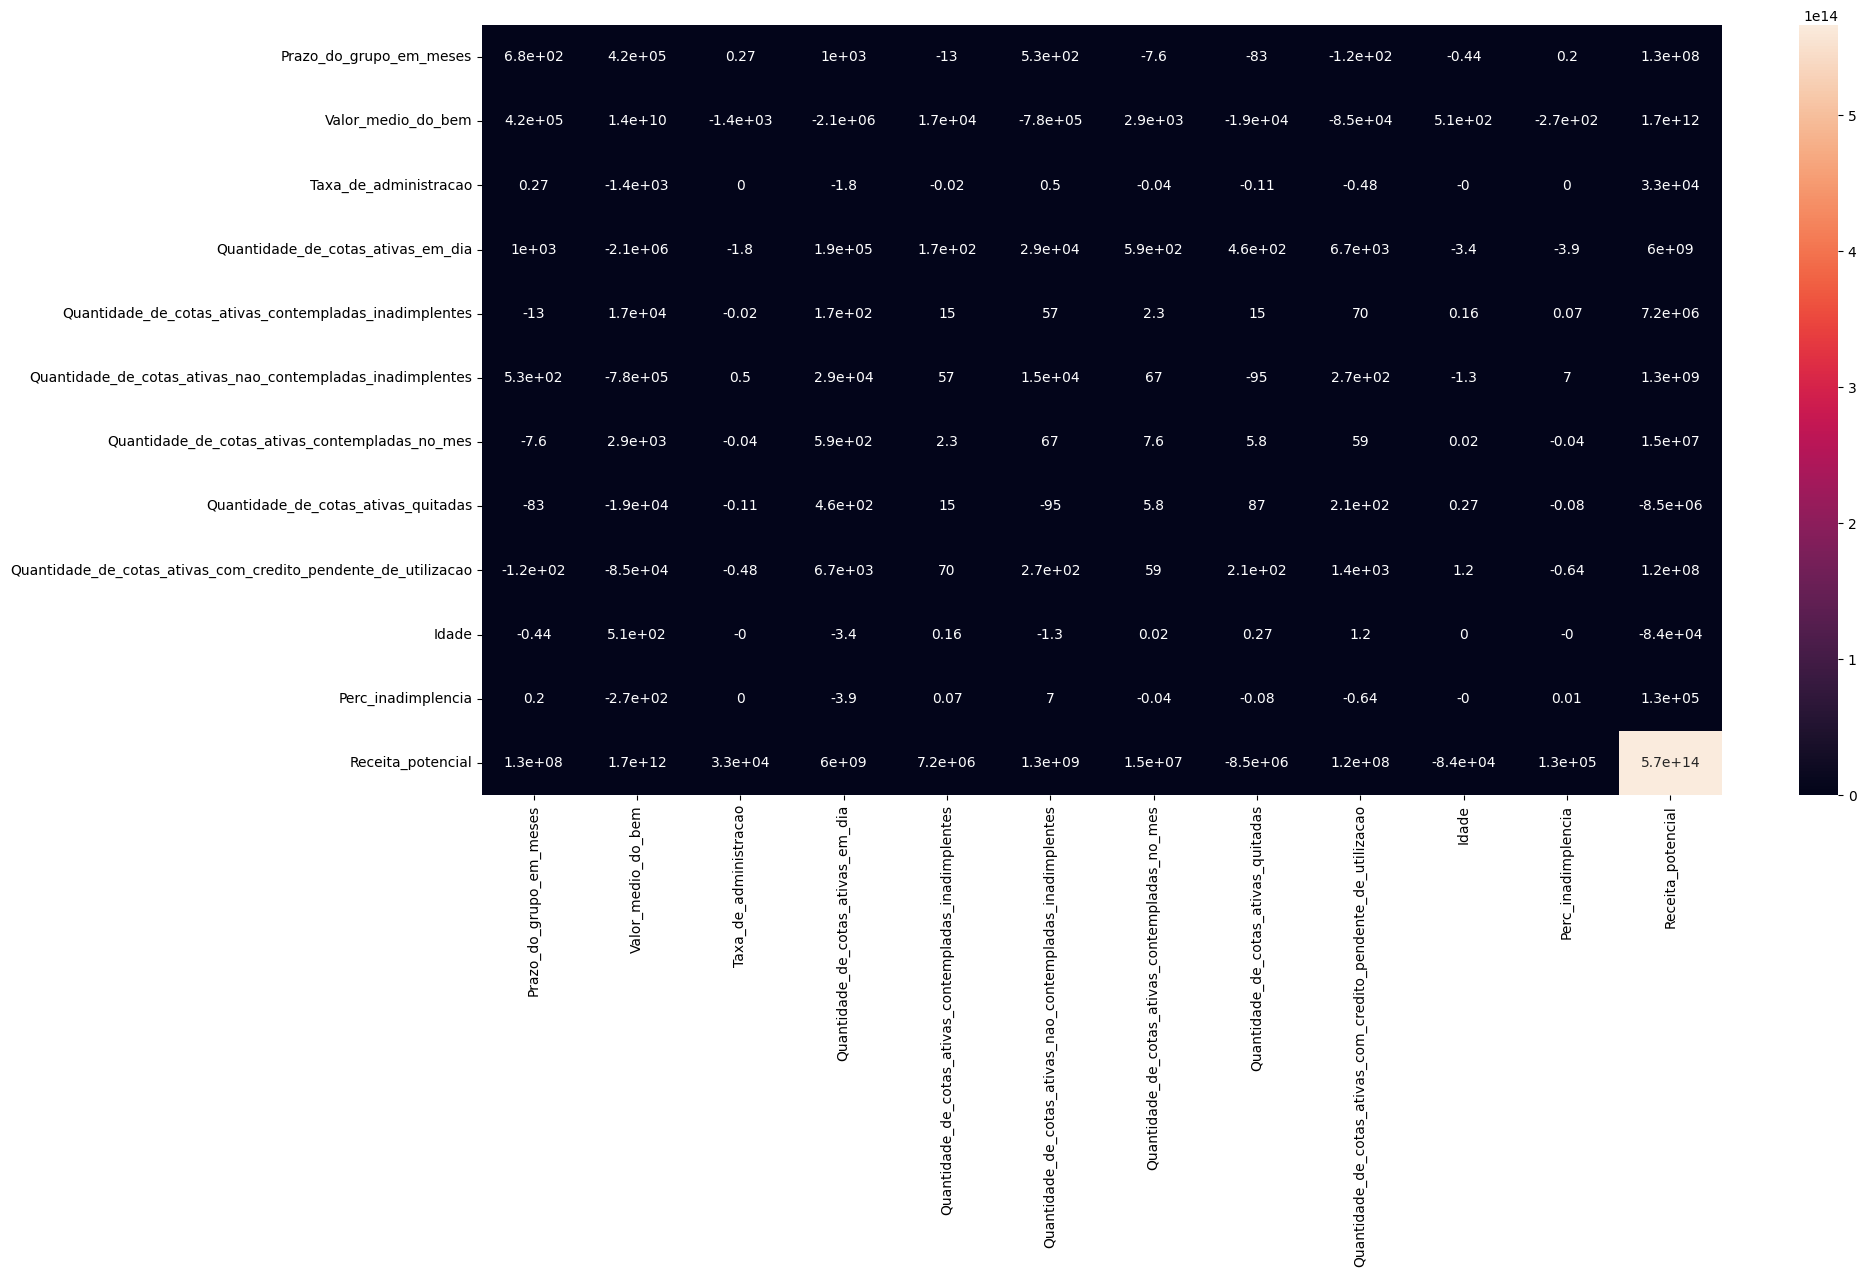

In [ ]:
plt.figure(figsize=(20,10))
covar = df[num_vars].cov().round(2)
sns.heatmap(covar,
            xticklabels = covar.columns.values,
            yticklabels = covar.columns.values,
            annot=True)

# Variáveis Dummies

Variáveis Dummies são variáveis binárias 0 e 1 para representar numericamente categorias de variáveis categóricas.

In [ ]:
df_dummies = pd.get_dummies(df[cat_vars],
                      columns=cat_vars,
                      drop_first=True,
                      prefix_sep='_')
df_dummies.head()

,Índice_de_correção_2,Índice_de_correção_3,Índice_de_correção_4,Índice_de_correção_6,Índice_de_correção_99,Condicao_novo,Fx_parcela_1270 - 1905,Fx_parcela_1905 - 2540,Fx_parcela_2540 - 3175,Fx_parcela_3175 - 3810,Fx_parcela_3810 - 4445,Fx_parcela_5715 - 6350,Fx_parcela_635 - 1270,Fx_parcela_6350 - 6985,Fx_prazo_até 5 anos,Fx_prazo_de 10 a 15 anos,Fx_prazo_de 15 a 20 anos,Fx_prazo_de 5 a 10 anos,Fx_idade_0.2 - 0.4,Fx_idade_0.4 - 0.6
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_dummies.shape

(15971, 20)

In [ ]:
df_dummies.columns

Index(['Índice_de_correção_2', 'Índice_de_correção_3', 'Índice_de_correção_4',
       'Índice_de_correção_6', 'Índice_de_correção_99', 'Condicao_novo',
       'Fx_parcela_1270 - 1905', 'Fx_parcela_1905 - 2540',
       'Fx_parcela_2540 - 3175', 'Fx_parcela_3175 - 3810',
       'Fx_parcela_3810 - 4445', 'Fx_parcela_5715 - 6350',
       'Fx_parcela_635 - 1270', 'Fx_parcela_6350 - 6985',
       'Fx_prazo_até 5 anos', 'Fx_prazo_de 10 a 15 anos',
       'Fx_prazo_de 15 a 20 anos', 'Fx_prazo_de 5 a 10 anos',
       'Fx_idade_0.2 - 0.4', 'Fx_idade_0.4 - 0.6'],
      dtype='object')

# Matriz de confusão

In [ ]:
#definir função que plota matriz de confusão
def plot_matriz_confusao(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('TARGET')
    plt.xlabel('Models response')

In [ ]:
df[num_vars].head()

,Prazo_do_grupo_em_meses,Valor_medio_do_bem,Taxa_de_administracao,Quantidade_de_cotas_ativas_em_dia,Quantidade_de_cotas_ativas_contempladas_inadimplentes,Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes,Quantidade_de_cotas_ativas_contempladas_no_mes,Quantidade_de_cotas_ativas_quitadas,Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao,Idade,Perc_inadimplencia,Receita_potencial
0,240,91418.9200,0.2446,74,0,0,1,0,1,0.0042,0.0000,1654682.4886
1,240,91559.6300,0.2431,97,0,11,0,0,1,0.0083,0.1019,2404356.3965
2,240,90884.9600,0.2430,101,0,12,1,0,2,0.0125,0.1062,2495700.4926
3,240,88698.6300,0.2421,123,1,22,0,0,2,0.0167,0.1575,3135496.7302
4,240,85857.8400,0.2415,132,2,70,0,0,2,0.0208,0.3529,4230215.6394


# Tratamento variáveis numéricas - normalização (minmaxscaler)




In [ ]:
df[num_vars].columns

Index(['Prazo_do_grupo_em_meses', 'Valor_medio_do_bem',
       'Taxa_de_administracao', 'Quantidade_de_cotas_ativas_em_dia',
       'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_contempladas_no_mes',
       'Quantidade_de_cotas_ativas_quitadas',
       'Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao',
       'Idade', 'Perc_inadimplencia', 'Receita_potencial'],
      dtype='object')

In [ ]:
#normalização das variáveis numéricas
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = SklearnTransformerWrapper(transformer = MinMaxScaler(),
                                          variables = ['Prazo_do_grupo_em_meses',
            #'INCC_DI',
            #'Numero_da_assembleia_geral_ordinária',
            'Valor_medio_do_bem',
            'Taxa_de_administracao',
            'Quantidade_de_cotas_ativas_em_dia',
            'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
            'Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',
            'Quantidade_de_cotas_ativas_contempladas_no_mes',
            #'Quantidade_de_cotas_excluidas',
            'Quantidade_de_cotas_ativas_quitadas',
            'Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao',
            #'Carteira_ativa',
            #'Carteira_inadimplente',
            #'Parcela',
            'Idade',
            #'Var_cotas_Excluidas',
            #'Perc_churn',
            'Perc_inadimplencia',
            'Receita_potencial'])

minmax_scaler.fit(df[num_vars])
num_vars_tratado=minmax_scaler.transform(df[num_vars])
num_vars_tratado

,Prazo_do_grupo_em_meses,Valor_medio_do_bem,Taxa_de_administracao,Quantidade_de_cotas_ativas_em_dia,Quantidade_de_cotas_ativas_contempladas_inadimplentes,Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes,Quantidade_de_cotas_ativas_contempladas_no_mes,Quantidade_de_cotas_ativas_quitadas,Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao,Idade,Perc_inadimplencia,Receita_potencial
0,0.5604,0.0540,0.7721,0.0157,0.0000,0.0000,0.0179,0.0000,0.0022,0.0038,0.0000,0.0040
1,0.5604,0.0542,0.7675,0.0207,0.0000,0.0049,0.0000,0.0000,0.0022,0.0133,0.1103,0.0059
2,0.5604,0.0535,0.7671,0.0215,0.0000,0.0053,0.0179,0.0000,0.0044,0.0228,0.1150,0.0061
3,0.5604,0.0515,0.7643,0.0263,0.0227,0.0097,0.0000,0.0000,0.0044,0.0323,0.1707,0.0078
4,0.5604,0.0488,0.7623,0.0282,0.0455,0.0309,0.0000,0.0000,0.0044,0.0417,0.3824,0.0106
...,...,...,...,...,...,...,...,...,...,...,...,...
15966,0.4505,0.0736,0.9107,0.1259,0.0000,0.1129,0.0179,0.0000,0.0200,0.1309,0.3294,0.0692
15967,0.4505,0.3288,0.9534,0.0661,0.0000,0.0079,0.0179,0.0000,0.0022,0.0057,0.0598,0.0956
15968,0.4505,0.3375,0.9555,0.0913,0.0227,0.0282,0.0179,0.0000,0.0044,0.0171,0.1437,0.1477
15969,0.4505,0.3477,0.9623,0.1191,0.0455,0.0569,0.0000,0.0000,0.0044,0.0285,0.2072,0.2137


# Tratamento variáveis categóricas

In [ ]:
df['Índice_de_correção']=df['Índice_de_correção'].astype(str,copy=True)

In [ ]:
cat_vars=['Índice_de_correção',
            'Condicao',
            'Fx_parcela',
            'Fx_prazo',
            'Fx_idade']

In [ ]:
df[cat_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15971 entries, 0 to 15970
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Índice_de_correção  15971 non-null  object
 1   Condicao            15971 non-null  object
 2   Fx_parcela          15971 non-null  object
 3   Fx_prazo            15971 non-null  object
 4   Fx_idade            15971 non-null  object
dtypes: object(5)
memory usage: 624.0+ KB


In [ ]:
#dumificação das variáveis categóricas
from feature_engine.encoding import OneHotEncoder
ohe = OneHotEncoder(variables=['Índice_de_correção', 'Condicao', 'Fx_parcela', 'Fx_prazo', 'Fx_idade'])
ohe.fit(df[cat_vars])
cat_vars2= ohe.transform(df[cat_vars])

In [ ]:
cat_vars2.shape

(15971, 25)

In [ ]:
cat_vars2

,Índice_de_correção_99,Índice_de_correção_3,Índice_de_correção_6,Índice_de_correção_2,Índice_de_correção_1,Índice_de_correção_4,Condicao_antigo,Condicao_novo,Fx_parcela_0 - 635,Fx_parcela_635 - 1270,...,Fx_parcela_6350 - 6985,Fx_parcela_5715 - 6350,Fx_prazo_de 15 a 20 anos,Fx_prazo_de 10 a 15 anos,Fx_prazo_acima de 20,Fx_prazo_de 5 a 10 anos,Fx_prazo_até 5 anos,Fx_idade_0 - 0.2,Fx_idade_0.2 - 0.4,Fx_idade_0.4 - 0.6
0,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15966,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
15967,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
15968,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
15969,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


# Modelagem de dados
1º modelo vou rodar somente com as variáveis numéricas

In [ ]:
features2 = cat_vars2.join(num_vars_tratado)

In [ ]:
X =  features2

In [ ]:
X.shape

(15971, 37)

# Separar o dataset em treino e teste

In [ ]:
X.columns

Index(['Índice_de_correção_99', 'Índice_de_correção_3', 'Índice_de_correção_6',
       'Índice_de_correção_2', 'Índice_de_correção_1', 'Índice_de_correção_4',
       'Condicao_antigo', 'Condicao_novo', 'Fx_parcela_0 - 635',
       'Fx_parcela_635 - 1270', 'Fx_parcela_3810 - 4445',
       'Fx_parcela_3175 - 3810', 'Fx_parcela_1270 - 1905',
       'Fx_parcela_1905 - 2540', 'Fx_parcela_2540 - 3175',
       'Fx_parcela_6350 - 6985', 'Fx_parcela_5715 - 6350',
       'Fx_prazo_de 15 a 20 anos', 'Fx_prazo_de 10 a 15 anos',
       'Fx_prazo_acima de 20', 'Fx_prazo_de 5 a 10 anos',
       'Fx_prazo_até 5 anos', 'Fx_idade_0 - 0.2', 'Fx_idade_0.2 - 0.4',
       'Fx_idade_0.4 - 0.6', 'Prazo_do_grupo_em_meses', 'Valor_medio_do_bem',
       'Taxa_de_administracao', 'Quantidade_de_cotas_ativas_em_dia',
       'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_contempladas_no_mes',
       'Quan

# variáveis selecionadas para o modelo

In [ ]:
#descomentar abaixo quando for rodar a reg logistica tratada
#features2=num_vars_tratado

In [ ]:
features2.columns

Index(['Índice_de_correção_99', 'Índice_de_correção_3', 'Índice_de_correção_6',
       'Índice_de_correção_2', 'Índice_de_correção_1', 'Índice_de_correção_4',
       'Condicao_antigo', 'Condicao_novo', 'Fx_parcela_0 - 635',
       'Fx_parcela_635 - 1270', 'Fx_parcela_3810 - 4445',
       'Fx_parcela_3175 - 3810', 'Fx_parcela_1270 - 1905',
       'Fx_parcela_1905 - 2540', 'Fx_parcela_2540 - 3175',
       'Fx_parcela_6350 - 6985', 'Fx_parcela_5715 - 6350',
       'Fx_prazo_de 15 a 20 anos', 'Fx_prazo_de 10 a 15 anos',
       'Fx_prazo_acima de 20', 'Fx_prazo_de 5 a 10 anos',
       'Fx_prazo_até 5 anos', 'Fx_idade_0 - 0.2', 'Fx_idade_0.2 - 0.4',
       'Fx_idade_0.4 - 0.6', 'Prazo_do_grupo_em_meses', 'Valor_medio_do_bem',
       'Taxa_de_administracao', 'Quantidade_de_cotas_ativas_em_dia',
       'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_contempladas_no_mes',
       'Quan

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features2,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify=df[target],
                                                    random_state=0)

In [ ]:
print('Dimensões dos datasets de treino e de teste:\n')
print('Dataset de treino',x_train.shape)
print('Resposta desejada do dataset de treino',y_train.shape)
print('dataset de teste',x_test.shape)
print('Resposta desejada do dataset de teste',y_test.shape)

Dimensões dos datasets de treino e de teste:

Dataset de treino (12776, 37)
Resposta desejada do dataset de treino (12776,)
dataset de teste (3195, 37)
Resposta desejada do dataset de teste (3195,)


# Proporção da variável resposta na base de treino:



In [ ]:
y_train.value_counts() / len(y_train)

1   0.5558
0   0.4442
Name: Risco, dtype: float64

# Proporção da variável resposta na base de teste:



In [ ]:
y_test.value_counts() / len(y_test)

1   0.5559
0   0.4441
Name: Risco, dtype: float64

# Proporção da variável resposta na base de dados:

In [ ]:
df[target].value_counts()

1    8877
0    7094
Name: Risco, dtype: int64

In [ ]:
df[target].value_counts() / len(df[target])

1   0.5558
0   0.4442
Name: Risco, dtype: float64

# Regressão Logística

In [ ]:
x_train.columns

Index(['Índice_de_correção_99', 'Índice_de_correção_3', 'Índice_de_correção_6',
       'Índice_de_correção_2', 'Índice_de_correção_1', 'Índice_de_correção_4',
       'Condicao_antigo', 'Condicao_novo', 'Fx_parcela_0 - 635',
       'Fx_parcela_635 - 1270', 'Fx_parcela_3810 - 4445',
       'Fx_parcela_3175 - 3810', 'Fx_parcela_1270 - 1905',
       'Fx_parcela_1905 - 2540', 'Fx_parcela_2540 - 3175',
       'Fx_parcela_6350 - 6985', 'Fx_parcela_5715 - 6350',
       'Fx_prazo_de 15 a 20 anos', 'Fx_prazo_de 10 a 15 anos',
       'Fx_prazo_acima de 20', 'Fx_prazo_de 5 a 10 anos',
       'Fx_prazo_até 5 anos', 'Fx_idade_0 - 0.2', 'Fx_idade_0.2 - 0.4',
       'Fx_idade_0.4 - 0.6', 'Prazo_do_grupo_em_meses', 'Valor_medio_do_bem',
       'Taxa_de_administracao', 'Quantidade_de_cotas_ativas_em_dia',
       'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_contempladas_no_mes',
       'Quan

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0, max_iter=1000)
logreg.fit(x_train, y_train)


# Treino
y_pred_logreg_train = logreg.predict(x_train)
y_score_logreg_train = logreg.predict_proba(x_train)

# Teste
y_pred_logreg_test = logreg.predict(x_test)
y_score_logreg_test = logreg.predict_proba(x_test)

## Aqui fui rodando a logística e deixando somente as variáveis com importância estatística (P[z] <0,05), retirando as variáveis uma a uma.

In [ ]:
sm.Logit(y_train, sm.add_constant(x_train[[

       'Prazo_do_grupo_em_meses', 'Valor_medio_do_bem',
       'Taxa_de_administracao', 'Quantidade_de_cotas_ativas_em_dia',
       'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_contempladas_no_mes',
       'Quantidade_de_cotas_ativas_quitadas',
       'Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao',
        'Perc_inadimplencia', 'Receita_potencial']])).fit().summary()

Optimization terminated successfully.
         Current function value: 0.576126
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Risco   No. Observations:                12776
Model:                          Logit   Df Residuals:                    12764
Method:                           MLE   Df Model:                           11
Date:                Fri, 11 Aug 2023   Pseudo R-squ.:                  0.1613
Time:                        00:43:39   Log-Likelihood:                -7360.6
converged:                       True   LL-Null:                       -8775.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================================================
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                            -0.6126      0.206     -2.980      0.003      -1.015      -0.210
Prazo_do_grupo_em_meses                                          -1.8702      0.330     -5.673      0.000      -2.516      -1.224
Valor_medio_do_bem                                               -2.1904      0.380     -5.764      0.000      -2.935      -1.446
Taxa_de_administracao                                             2.9428      0.183     16.043      0.000       2.583       3.302
Quantidade_de_cotas_ativas_em_dia                                -4.9055      0.523     -9.380      0.000      -5.931      -3.880
Quantidade_de_cotas_ativas_contempladas_inadimplentes            -0.9524      0.333     -2.864      0.004      -1.604      -0.301
Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes        17.2280      1.305     13.205      0.000      14.671      19.785
Quantidade_de_cotas_ativas_contempladas_no_mes                    2.1633      0.651      3.325      0.001       0.888       3.439
Quantidade_de_cotas_ativas_quitadas                             -18.4896      1.490    -12.411      0.000     -21.410     -15.570
Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao    -2.1564      0.573     -3.761      0.000      -3.280      -1.033
Perc_inadimplencia                                                1.1331      0.381      2.971      0.003       0.386       1.880
Receita_potencial                                                 2.8176      0.920      3.063      0.002       1.015       4.621
=================================================================================================================================
"""

## Acurácia

In [ ]:
from sklearn.metrics import accuracy_score

#Treino
acc_logreg_train = round(accuracy_score(y_pred_logreg_train, y_train) * 100, 2)
print('Train Dataset Accuracy: ',acc_logreg_train)

#Teste
acc_logreg_test = round(accuracy_score(y_pred_logreg_test, y_test) * 100, 2)
print('Test Dataset Accuracy: ',acc_logreg_test)



Train Dataset Accuracy:  71.93
Test Dataset Accuracy:  71.42


## Area Under ROC

In [ ]:
from sklearn.metrics import roc_curve, auc

# Treino
fpr_logreg_train, tpr_logreg_train, thresholds = roc_curve(y_train, y_score_logreg_train[:,1])
roc_auc_logreg_train = 100*round(auc(fpr_logreg_train, tpr_logreg_train), 4)
print('Train Dataset Accuracy: ',roc_auc_logreg_train)

# Teste
fpr_logreg_test, tpr_logreg_test, thresholds = roc_curve(y_test, y_score_logreg_test[:,1])
roc_auc_logreg_test = 100*round(auc(fpr_logreg_test, tpr_logreg_test), 4)
print('Test Dataset Accuracy: ',roc_auc_logreg_test)

Train Dataset Accuracy:  78.36999999999999
Test Dataset Accuracy:  76.81


## Gini Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

# Train
gini_logreg_train = 100*round((2*roc_auc_logreg_train/100 - 1), 2)
print('Train Dataset Accuracy: ',gini_logreg_train)

# Test
gini_logreg_test = 100*round((2*roc_auc_logreg_test/100 - 1), 2)
print('Test Dataset Accuracy: ',gini_logreg_test)

Train Dataset Accuracy:  56.99999999999999
Test Dataset Accuracy:  54.0


## Matriz de Confusão

Confusion matrix without normalization


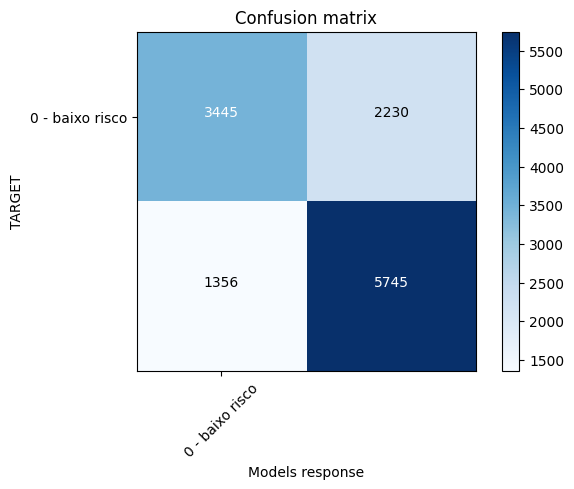

In [ ]:
matrix = confusion_matrix(y_train, y_pred_logreg_train)
np.set_printoptions(precision=2)

plt.figure()
plot_matriz_confusao(matrix, classes=["0 - baixo risco"],
                      title='Confusion matrix',)
plt.show()

In [ ]:
# True Positives
TP = matrix[1, 1]
# True Negatives
TN = matrix[0, 0]
# False Positives
FP = matrix[0, 1]
# False Negatives
FN = matrix[1, 0]

In [ ]:
print(TN / float(TN + FP))

0.6070484581497797


Confusion matrix without normalization


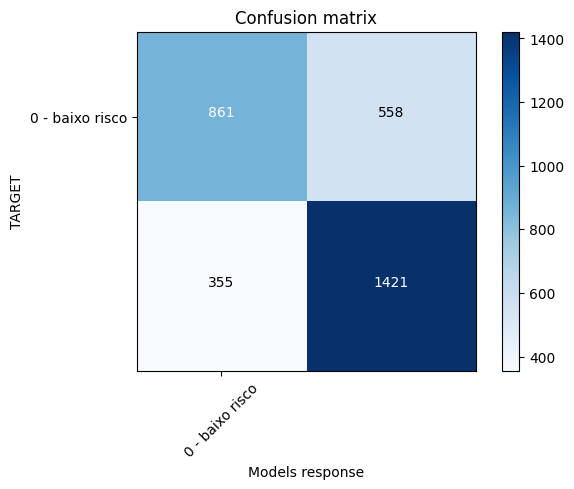

In [ ]:
matrix = confusion_matrix(y_test, y_pred_logreg_test)
np.set_printoptions(precision=2)

plt.figure()
plot_matriz_confusao(matrix, classes=["0 - baixo risco"],
                      title='Confusion matrix',)
plt.show()

In [ ]:
# True Positives
TP = matrix[1, 1]
# True Negatives
TN = matrix[0, 0]
# False Positives
FP = matrix[0, 1]
# False Negatives
FN = matrix[1, 0]

In [ ]:
print(TN / float(TN + FP))

0.6067653276955602


## Cross Validation Classification Report

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_train, y_pred_logreg_train,digits=4)
print('\n\nCross Validation Classification Report:\n',report)



Cross Validation Classification Report:
               precision    recall  f1-score   support

           0     0.7176    0.6070    0.6577      5675
           1     0.7204    0.8090    0.7621      7101

    accuracy                         0.7193     12776
   macro avg     0.7190    0.7080    0.7099     12776
weighted avg     0.7191    0.7193    0.7157     12776



In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_logreg_test,digits=4)
print('\n\nCross Validation Classification Report:\n',report)



Cross Validation Classification Report:
               precision    recall  f1-score   support

           0     0.7081    0.6068    0.6535      1419
           1     0.7180    0.8001    0.7569      1776

    accuracy                         0.7142      3195
   macro avg     0.7130    0.7034    0.7052      3195
weighted avg     0.7136    0.7142    0.7110      3195



# Árvore de Decisão

In [ ]:
X1 = cat_vars2.join(df[num_vars])

In [ ]:
X1.dtypes

Índice_de_correção_99                                              int64
Índice_de_correção_3                                               int64
Índice_de_correção_6                                               int64
Índice_de_correção_2                                               int64
Índice_de_correção_1                                               int64
Índice_de_correção_4                                               int64
Condicao_antigo                                                    int64
Condicao_novo                                                      int64
Fx_parcela_0 - 635                                                 int64
Fx_parcela_635 - 1270                                              int64
Fx_parcela_3810 - 4445                                             int64
Fx_parcela_3175 - 3810                                             int64
Fx_parcela_1270 - 1905                                             int64
Fx_parcela_1905 - 2540                             

In [ ]:
X1.shape

(15971, 37)

In [ ]:
X1.columns

Index(['Índice_de_correção_99', 'Índice_de_correção_3', 'Índice_de_correção_6',
       'Índice_de_correção_2', 'Índice_de_correção_1', 'Índice_de_correção_4',
       'Condicao_antigo', 'Condicao_novo', 'Fx_parcela_0 - 635',
       'Fx_parcela_635 - 1270', 'Fx_parcela_3810 - 4445',
       'Fx_parcela_3175 - 3810', 'Fx_parcela_1270 - 1905',
       'Fx_parcela_1905 - 2540', 'Fx_parcela_2540 - 3175',
       'Fx_parcela_6350 - 6985', 'Fx_parcela_5715 - 6350',
       'Fx_prazo_de 15 a 20 anos', 'Fx_prazo_de 10 a 15 anos',
       'Fx_prazo_acima de 20', 'Fx_prazo_de 5 a 10 anos',
       'Fx_prazo_até 5 anos', 'Fx_idade_0 - 0.2', 'Fx_idade_0.2 - 0.4',
       'Fx_idade_0.4 - 0.6', 'Prazo_do_grupo_em_meses', 'Valor_medio_do_bem',
       'Taxa_de_administracao', 'Quantidade_de_cotas_ativas_em_dia',
       'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_contempladas_no_mes',
       'Quan

## Inicialmente rodei o modelo com todas as váriáveis e o resultado foi 0. resolvi tirar as váriáveis altamente correlacionadas entre sí e o resultado ainda estava ruim.Verifiquei que estava ocorrendo vazamento de informação (variáveis altamente correlacionadas com a variável resposta), com isso resolvi tirar essas variáveis e o modelo performou melhor.

In [ ]:
features3=['Índice_de_correção_99',
           'Índice_de_correção_3',
           'Índice_de_correção_6',
       'Índice_de_correção_2',
       'Índice_de_correção_1',
        'Índice_de_correção_4',
       'Condicao_antigo',
       'Condicao_novo',
       'Fx_parcela_0 - 635',
       'Fx_parcela_635 - 1270',
       'Fx_parcela_3810 - 4445',
       'Fx_parcela_3175 - 3810',
       'Fx_parcela_1270 - 1905',
       'Fx_parcela_1905 - 2540',
       'Fx_parcela_2540 - 3175',
       'Fx_parcela_6350 - 6985',
       'Fx_parcela_5715 - 6350',
       'Fx_prazo_de 15 a 20 anos',
        'Fx_prazo_de 10 a 15 anos',
       'Fx_prazo_acima de 20',
        'Fx_prazo_de 5 a 10 anos',
       'Fx_prazo_até 5 anos',
        'Fx_idade_0 - 0.2',
         'Fx_idade_0.2 - 0.4',
       'Fx_idade_0.4 - 0.6',
       'Prazo_do_grupo_em_meses',
        #'INCC_DI',
       #'Numero_da_assembleia_geral_ordinária',
       # 'Carteira_ativa',
       #'Carteira_inadimplente',
       #'Parcela',
       #'Var_cotas_Excluidas',
        #'Perc_churn',
       'Valor_medio_do_bem',
       'Taxa_de_administracao',
       'Quantidade_de_cotas_ativas_em_dia',
       'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_contempladas_no_mes',
       #'Quantidade_de_cotas_excluidas',
       'Quantidade_de_cotas_ativas_quitadas',
       'Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao',
       'Idade',
       'Perc_inadimplencia',
        'Receita_potencial'
           ]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X1[features3],
                                                    y,
                                                    test_size = 0.2,
                                                    stratify=df[target],
                                                    random_state=0)

In [ ]:
print('Dimensões dos datasets de treino e de teste:\n')
print('Dataset de treino',x_train.shape)
print('Resposta desejada do dataset de treino',y_train.shape)
print('dataset de teste',x_test.shape)
print('Resposta desejada do dataset de teste',y_test.shape)

Dimensões dos datasets de treino e de teste:

Dataset de treino (12776, 37)
Resposta desejada do dataset de treino (12776,)
dataset de teste (3195, 37)
Resposta desejada do dataset de teste (3195,)


In [ ]:
y_train.value_counts() / len(y_train)

1   0.5558
0   0.4442
Name: Risco, dtype: float64

In [ ]:
y_test.value_counts() / len(y_test)

1   0.5559
0   0.4441
Name: Risco, dtype: float64

In [ ]:
df[target].value_counts()

1    8877
0    7094
Name: Risco, dtype: int64

In [ ]:
df[target].value_counts() / len(df[target])

1   0.5558
0   0.4442
Name: Risco, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=123,max_depth=2)
dectree.fit(x_train, y_train)


# Train
y_pred_dectree_train = dectree.predict(x_train)
y_score_dectree_train = dectree.predict_proba(x_train)[:,1]

# Test
y_pred_dectree_test = dectree.predict(x_test)
y_score_dectree_test = dectree.predict_proba(x_test)[:,1]

## Acurácia

In [ ]:
from sklearn.metrics import accuracy_score

#Train
acc_dectree_train = round(accuracy_score(y_pred_dectree_train, y_train) * 100, 4)
print('Train Dataset Accuracy: ',acc_dectree_train)

#Test
acc_dectree_test = round(accuracy_score(y_pred_dectree_test, y_test) * 100, 4)
print('Test Dataset Accuracy: ',acc_dectree_test)

Train Dataset Accuracy:  67.7912
Test Dataset Accuracy:  66.1346


Confusion matrix without normalization


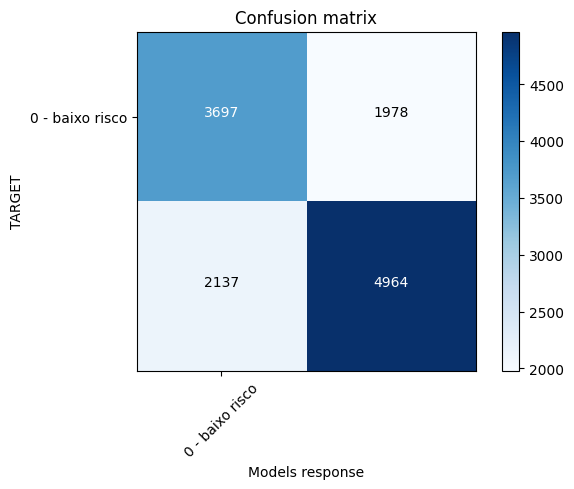

In [ ]:
matrix = confusion_matrix(y_train, y_pred_dectree_train)
np.set_printoptions(precision=2)

plt.figure()
plot_matriz_confusao(matrix, classes=["0 - baixo risco"],
                      title='Confusion matrix',)
plt.show()

In [ ]:
# True Positives
TP = matrix[1, 1]
# True Negatives
TN = matrix[0, 0]
# False Positives
FP = matrix[0, 1]
# False Negatives
FN = matrix[1, 0]

In [ ]:
print(TN / float(TN + FP))

0.6514537444933921


Confusion matrix without normalization


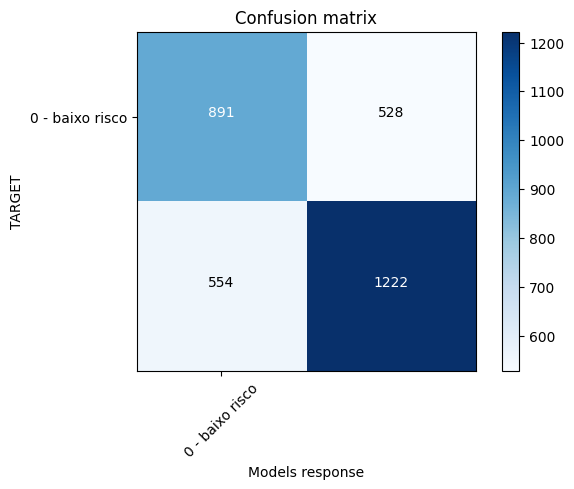

In [ ]:
matrix = confusion_matrix(y_test, y_pred_dectree_test)
np.set_printoptions(precision=2)

plt.figure()
plot_matriz_confusao(matrix, classes=["0 - baixo risco"],
                      title='Confusion matrix',)
plt.show()

In [ ]:
# True Positives
TP = matrix[1, 1]
# True Negatives
TN = matrix[0, 0]
# False Positives
FP = matrix[0, 1]
# False Negatives
FN = matrix[1, 0]

In [ ]:
print(TN / float(TN + FP))

0.627906976744186


## Vazamento de informação

In [ ]:
# criando a lista com as features
features3 =  ['Risco','Prazo_do_grupo_em_meses',
            'INCC_DI',
            'Numero_da_assembleia_geral_ordinária',
            'Valor_medio_do_bem',
            'Taxa_de_administracao',
            'Quantidade_de_cotas_ativas_em_dia',
            'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
            'Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',
            'Quantidade_de_cotas_ativas_contempladas_no_mes',
            'Quantidade_de_cotas_excluidas',
            'Quantidade_de_cotas_ativas_quitadas',
            'Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao',
            'Carteira_ativa',
            'Carteira_inadimplente',
            'Parcela',
            'Idade',
            'Var_cotas_Excluidas',
            'Perc_churn',
            'Perc_inadimplencia',
            'Receita_potencial']

In [ ]:
df[features3].corr()

,Risco,Prazo_do_grupo_em_meses,INCC_DI,Numero_da_assembleia_geral_ordinária,Valor_medio_do_bem,Taxa_de_administracao,Quantidade_de_cotas_ativas_em_dia,Quantidade_de_cotas_ativas_contempladas_inadimplentes,Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes,Quantidade_de_cotas_ativas_contempladas_no_mes,...,Quantidade_de_cotas_ativas_quitadas,Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao,Carteira_ativa,Carteira_inadimplente,Parcela,Idade,Var_cotas_Excluidas,Perc_churn,Perc_inadimplencia,Receita_potencial
Risco,1.0000,0.0815,-0.0169,-0.1586,-0.1341,0.2856,-0.0151,-0.1076,0.2267,-0.1114,...,-0.1964,-0.2040,0.0406,0.2223,-0.1591,-0.1855,0.4645,0.5810,0.2624,0.0216
Prazo_do_grupo_em_meses,0.0815,1.0000,-0.0001,-0.0660,0.1360,0.2232,0.0879,-0.1295,0.1649,-0.1059,...,-0.3394,-0.1254,0.1130,0.1600,-0.0957,-0.2587,0.1006,0.0870,0.0765,0.2023
INCC_DI,-0.0169,-0.0001,1.0000,0.1271,0.0159,0.0104,0.0458,0.0803,-0.0095,0.0631,...,0.0431,0.0880,0.0372,-0.0069,0.0145,0.1226,-0.0032,-0.0226,-0.0412,0.0353
Numero_da_assembleia_geral_ordinária,-0.1586,-0.0660,0.1271,1.0000,0.0833,-0.0330,-0.1058,0.6025,-0.1329,0.1234,...,0.3023,0.4966,-0.1169,-0.1131,0.1079,0.9630,-0.1590,-0.1707,-0.0759,-0.0147
Valor_medio_do_bem,-0.1341,0.1360,0.0159,0.0833,1.0000,-0.2510,-0.0418,0.0374,-0.0541,0.0090,...,-0.0173,-0.0191,-0.0481,-0.0527,0.9623,0.0672,-0.0760,-0.0921,-0.0237,0.6003
Taxa_de_administracao,0.2856,0.2232,0.0104,-0.0330,-0.2510,1.0000,-0.0892,-0.1277,0.0879,-0.3381,...,-0.2554,-0.2741,-0.0556,0.0835,-0.2650,-0.1063,0.1134,0.2074,0.1288,0.0299
Quantidade_de_cotas_ativas_em_dia,-0.0151,0.0879,0.0458,-0.1058,-0.0418,-0.0892,1.0000,0.1007,0.5441,0.4944,...,0.1140,0.4113,0.9795,0.5450,-0.0814,-0.1208,0.4271,-0.0632,-0.0924,0.5793
Quantidade_de_cotas_ativas_contempladas_inadimplentes,-0.1076,-0.1295,0.0803,0.6025,0.0374,-0.1277,0.1007,1.0000,0.1192,0.2094,...,0.4015,0.4740,0.1216,0.1506,0.0801,0.6340,0.0676,-0.0422,0.1790,0.0768
Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes,0.2267,0.1649,-0.0095,-0.1329,-0.0541,0.0879,0.5441,0.1192,1.0000,0.1998,...,-0.0830,0.0575,0.7018,0.9995,-0.0891,-0.1604,0.6579,0.2063,0.5793,0.4432
Quantidade_de_cotas_ativas_contempladas_no_mes,-0.1114,-0.1059,0.0631,0.1234,0.0090,-0.3381,0.4944,0.2094,0.1998,1.0000,...,0.2271,0.5681,0.4689,0.2056,-0.0018,0.1326,0.1531,-0.1128,-0.1500,0.2297


<Axes: >

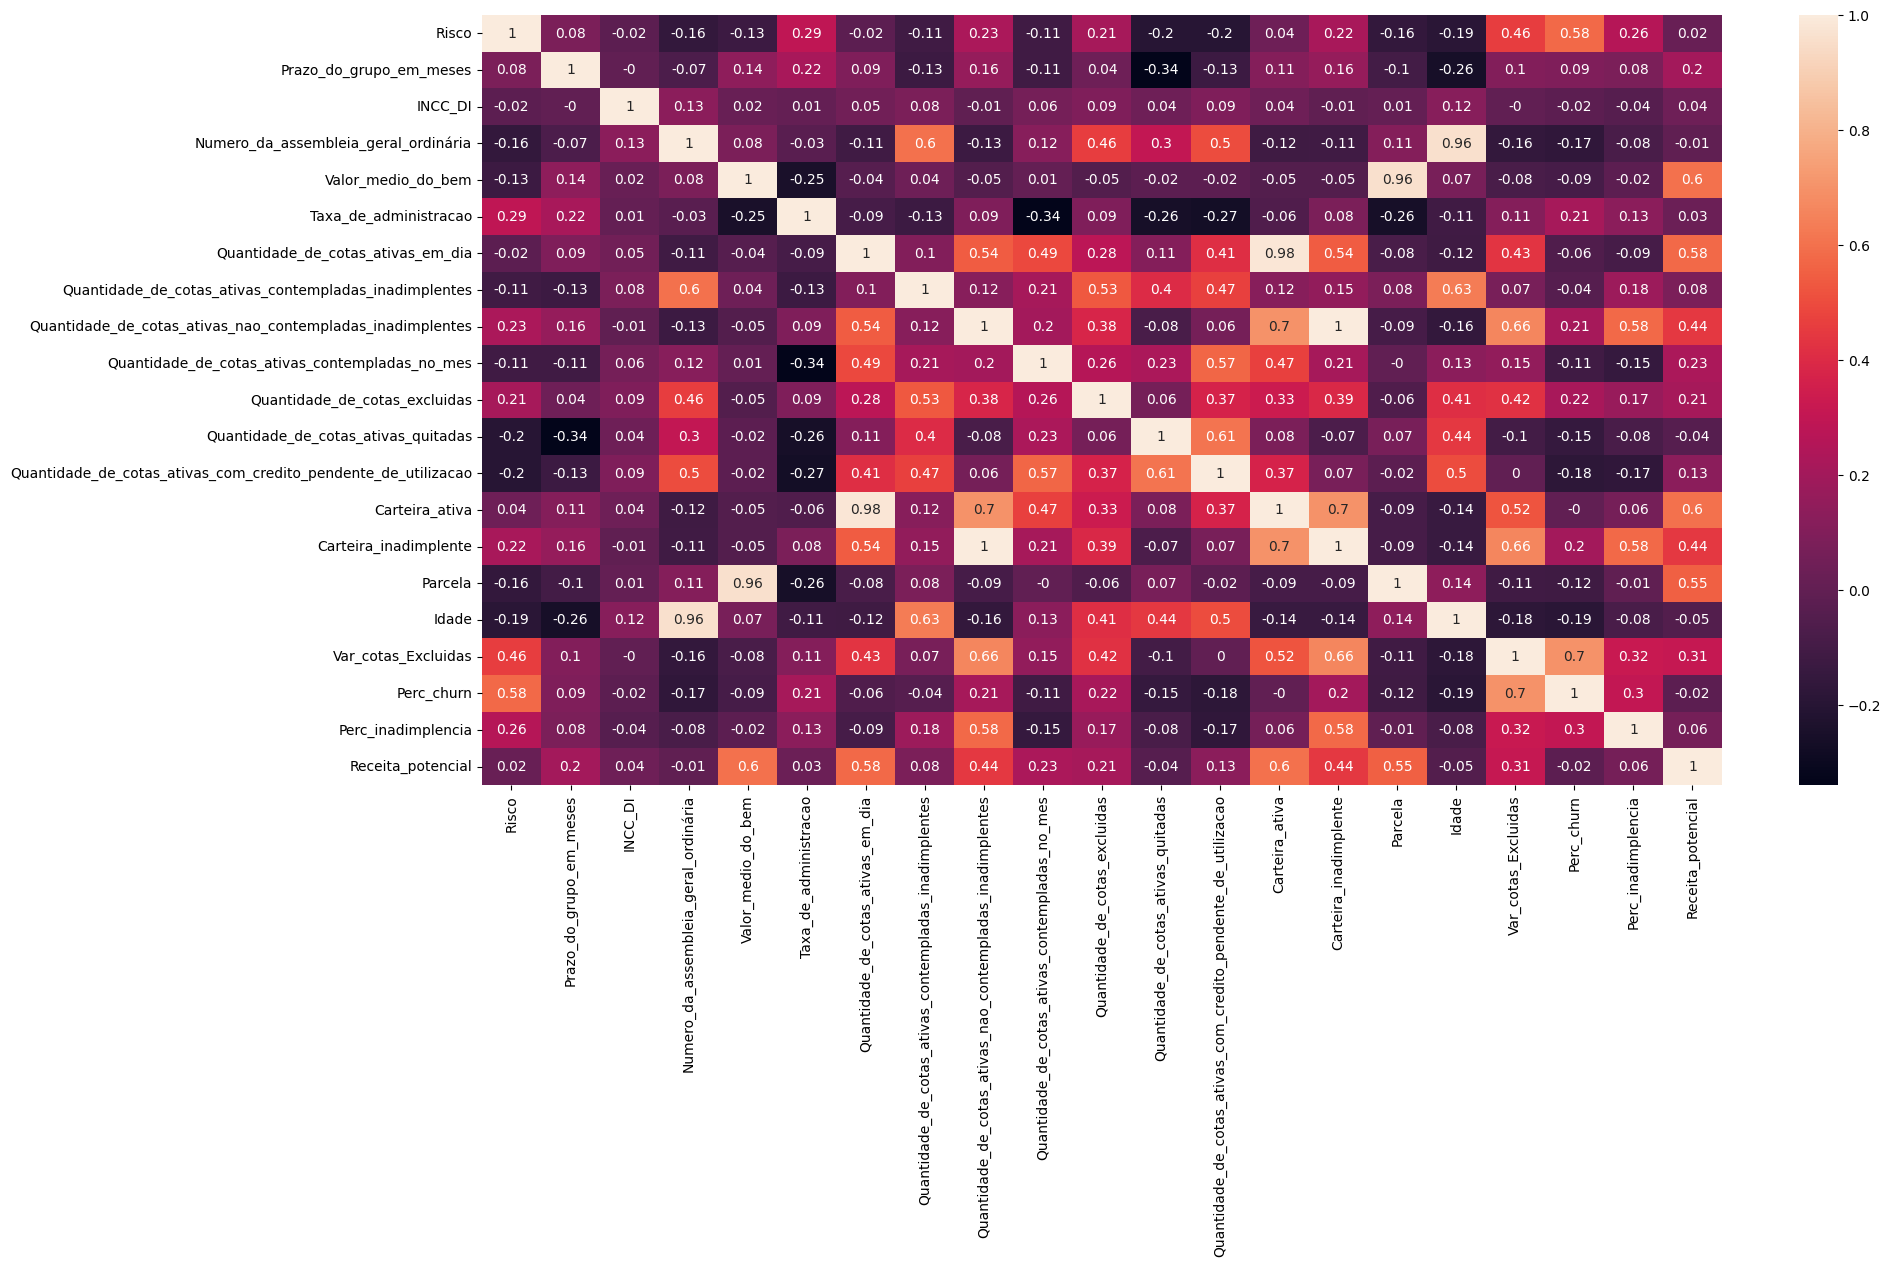

In [ ]:
#variáveis altamente correlacionadas com a variável resposta "Risco"
plt.figure(figsize=(20,10))
correl = df[features3].corr().round(2)
sns.heatmap(correl,
            xticklabels = correl.columns.values,
            yticklabels = correl.columns.values,
            annot=True)

## Area Under ROC

In [ ]:
from sklearn.metrics import roc_curve, auc

# Train
fpr_dectree_train, tpr_dectree_train, thresholds = roc_curve(y_train, y_score_dectree_train)
roc_auc_dectree_train = 100*round(auc(fpr_dectree_train, tpr_dectree_train), 2)
print('Train Dataset Area Under ROC: ',roc_auc_dectree_train)

# Test
fpr_dectree_test, tpr_dectree_test, thresholds = roc_curve(y_test, y_score_dectree_test)
roc_auc_dectree_test = 100*round(auc(fpr_dectree_test, tpr_dectree_test), 2)
print('Test Dataset Area Under ROC: ',roc_auc_dectree_test)

Train Dataset Area Under ROC:  70.0
Test Dataset Area Under ROC:  68.0


## Gini Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

# Train
gini_dectree_train = 100*round((2*roc_auc_dectree_train/100 - 1), 2)
print('Train Dataset Gini Curve: ',gini_dectree_train)

# Test
gini_dectree_test = 100*round((2*roc_auc_dectree_test/100 - 1), 2)
print('Test Dataset Gini Curve: ',gini_dectree_test)

Train Dataset Gini Curve:  40.0
Test Dataset Gini Curve:  36.0


## Matriz de Confusão

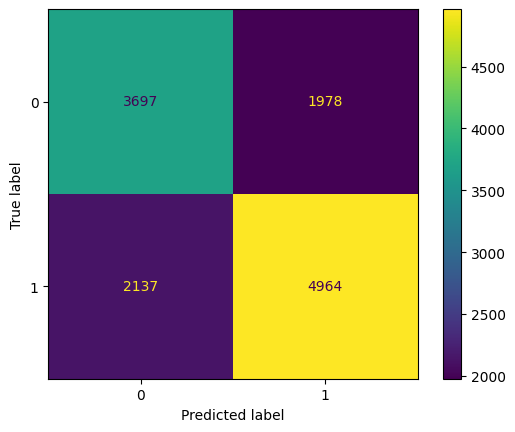

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
a=ConfusionMatrixDisplay.from_estimator(dectree, x_train, y_train, values_format='d')

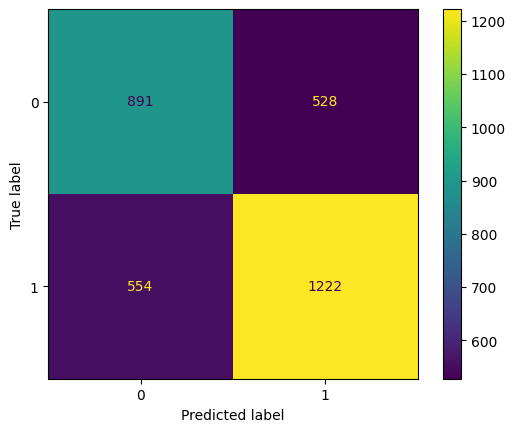

In [ ]:
ConfusionMatrixDisplay.from_estimator(dectree, x_test, y_test, values_format='d');

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, dectree.predict(x_train))}")
print(f"Acurácia (OOT/Teste): {accuracy_score(y_test, dectree.predict(x_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, dectree.predict(x_train))}")
print(f"Acurácia Balanceada (OOT/Teste): {balanced_accuracy_score(y_test, dectree.predict(x_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, dectree.predict(x_train))}")
print(f"Precision (OOT/Teste): {precision_score(y_test, dectree.predict(x_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, dectree.predict(x_train))}")
print(f"Recall (OOT/Teste): {recall_score(y_test, dectree.predict(x_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, dectree.predict(x_train))}")
print(f"F1-Score (OOT/Teste): {f1_score(y_test, dectree.predict(x_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, dectree.predict_proba(x_train)[:,1])}")
print(f"ROCAUC (OOT/Teste): {roc_auc_score(y_test, dectree.predict_proba(x_test)[:,1])}")

Acurácia (Treino): 0.6779117094552286
Acurácia (OOT/Teste): 0.6613458528951487
Acurácia Balanceada (Treino): 0.6752551077064904
Acurácia Balanceada (OOT/Teste): 0.6579850199036246
Precision (Treino): 0.7150677038317488
Precision (OOT/Teste): 0.6982857142857143
Recall (Treino): 0.6990564709195888
Recall (OOT/Teste): 0.6880630630630631
F1-Score (Treino): 0.7069714448479669
F1-Score (OOT/Teste): 0.6931366988088487
ROCAUC (Treino): 0.696110394577422
ROCAUC (OOT/Teste): 0.6780711737107087


In [ ]:
metricas = {
    'model': ['DecisionTree', 'DecisionTree'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_train, dectree.predict(x_train)), accuracy_score(y_test, dectree.predict(x_test))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, dectree.predict(x_train)), balanced_accuracy_score(y_test, dectree.predict(x_test))],
    'precision': [precision_score(y_train, dectree.predict(x_train)), precision_score(y_test, dectree.predict(x_test))],
    'recall': [recall_score(y_train, dectree.predict(x_train)), recall_score(y_test, dectree.predict(x_test))],
    'f1_score': [f1_score(y_train, dectree.predict(x_train)), f1_score(y_test, dectree.predict(x_test))],
    'rocauc': [roc_auc_score(y_train, dectree.predict_proba(x_train)[:,1]), roc_auc_score(y_test, dectree.predict_proba(x_test)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,DecisionTree,treino,0.6779,0.6753,0.7151,0.6991,0.7070,0.6961
1,DecisionTree,teste,0.6613,0.6580,0.6983,0.6881,0.6931,0.6781


# Realizando o plot da Roc Curve para ambos os conjuntos de dados (treino e teste)

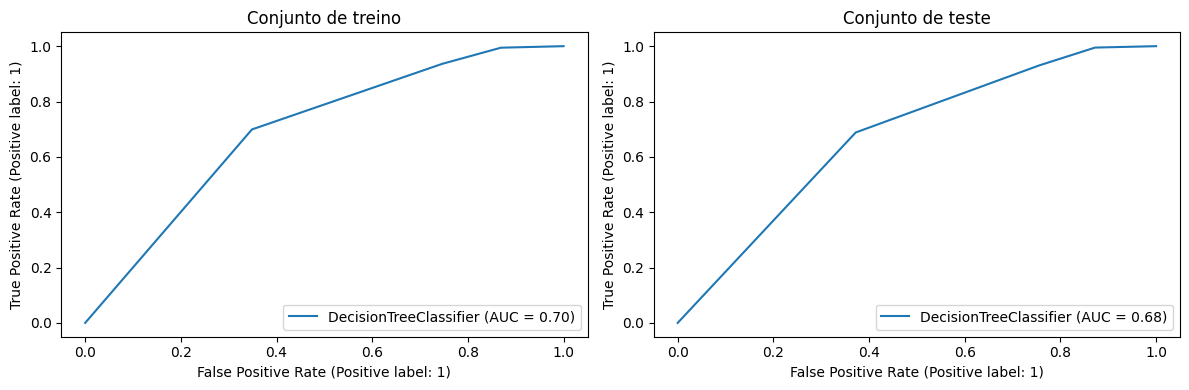

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].set_title('Conjunto de treino')
RocCurveDisplay.from_estimator(dectree, x_train, y_train, ax=axes[0]);

axes[1].set_title('Conjunto de teste')
RocCurveDisplay.from_estimator(dectree, x_test, y_test, ax=axes[1]);

plt.tight_layout()

## Cross Validation Classification Report

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_dectree_test)
print('\n\nCross Validation Classification Report:\n',report)



Cross Validation Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.63      0.62      1419
           1       0.70      0.69      0.69      1776

    accuracy                           0.66      3195
   macro avg       0.66      0.66      0.66      3195
weighted avg       0.66      0.66      0.66      3195



In [ ]:
x_train.columns

Index(['Índice_de_correção_99', 'Índice_de_correção_3', 'Índice_de_correção_6',
       'Índice_de_correção_2', 'Índice_de_correção_1', 'Índice_de_correção_4',
       'Condicao_antigo', 'Condicao_novo', 'Fx_parcela_0 - 635',
       'Fx_parcela_635 - 1270', 'Fx_parcela_3810 - 4445',
       'Fx_parcela_3175 - 3810', 'Fx_parcela_1270 - 1905',
       'Fx_parcela_1905 - 2540', 'Fx_parcela_2540 - 3175',
       'Fx_parcela_6350 - 6985', 'Fx_parcela_5715 - 6350',
       'Fx_prazo_de 15 a 20 anos', 'Fx_prazo_de 10 a 15 anos',
       'Fx_prazo_acima de 20', 'Fx_prazo_de 5 a 10 anos',
       'Fx_prazo_até 5 anos', 'Fx_idade_0 - 0.2', 'Fx_idade_0.2 - 0.4',
       'Fx_idade_0.4 - 0.6', 'Prazo_do_grupo_em_meses', 'Valor_medio_do_bem',
       'Taxa_de_administracao', 'Quantidade_de_cotas_ativas_em_dia',
       'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',
       'Quantidade_de_cotas_ativas_contempladas_no_mes',
       'Quan

In [ ]:
from sklearn import tree

tree.export_graphviz(
    dectree.fit(x_train, y_train),
    class_names=['baixo_risco', 'alto_risco'],
    filled=True,
    rounded=True,
max_depth=2,
    out_file='tree.dot'
)

In [ ]:
!dot -Tpng tree.dot -o tree.png

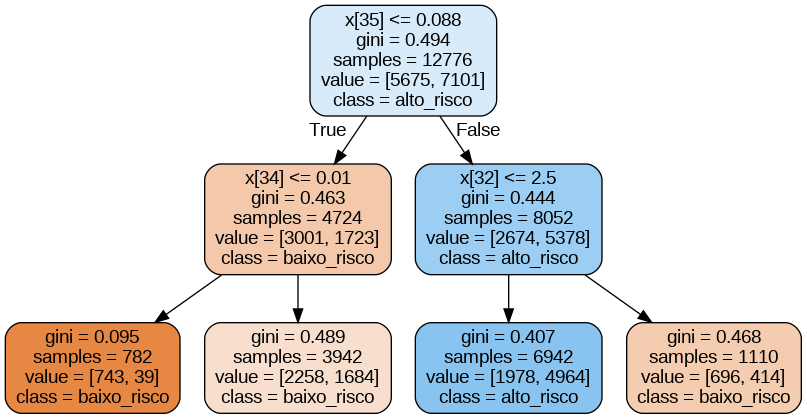

In [ ]:
from IPython.display import Image

Image('tree.png')

In [ ]:
x_train.dtypes

Índice_de_correção_99                                              int64
Índice_de_correção_3                                               int64
Índice_de_correção_6                                               int64
Índice_de_correção_2                                               int64
Índice_de_correção_1                                               int64
Índice_de_correção_4                                               int64
Condicao_antigo                                                    int64
Condicao_novo                                                      int64
Fx_parcela_0 - 635                                                 int64
Fx_parcela_635 - 1270                                              int64
Fx_parcela_3810 - 4445                                             int64
Fx_parcela_3175 - 3810                                             int64
Fx_parcela_1270 - 1905                                             int64
Fx_parcela_1905 - 2540                             

##Comparando vários modelos

## Instalando as bibliotecas necessárias

In [ ]:
!pip install feature-engine lightgbm xgboost catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.1 MB/s eta 0:00:00


##Carregando o conjunto de dados (comentei variáveis altamente correlacionadas para retirá-las do modelo)

In [ ]:
# Variáveis chaves da tabela 5
key_vars = ['Chave_nome_adm_e_cod_grupo',
            'Nome_da_Administradora',
            'Codigo_do_grupo',
            'CNPJ_da_Administradora',
            'Data_base'
            ]

# Variáveis numéricas 20
num_vars = ['Prazo_do_grupo_em_meses',
            'INCC_DI',
            'Numero_da_assembleia_geral_ordinária',
            'Valor_medio_do_bem',
            'Taxa_de_administracao',
            'Quantidade_de_cotas_ativas_em_dia',
            'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
            'Quantidade_de_cotas_ativas_nao_contempladas_inadimplentes',
            'Quantidade_de_cotas_ativas_contempladas_no_mes',
            'Quantidade_de_cotas_excluidas',
            'Quantidade_de_cotas_ativas_quitadas',
            'Quantidade_de_cotas_ativas_com_credito_pendente_de_utilizacao',
            #'Carteira_ativa',
            #'Carteira_inadimplente',
            #'Parcela',
            #'Idade',
            #'Var_cotas_Excluidas',
            #'Perc_churn',
            'Perc_inadimplencia',
            'Receita_potencial']

# Variáveis categóricas 5
cat_vars = ['Índice_de_correção',
            'Condicao',
            'Fx_parcela',
            'Fx_prazo',
            'Fx_idade']

# Variável resposta/target 1
target = 'Risco'

# criando a lista com as features
features = cat_vars + num_vars

# Separando a base de features
X = df[features]

# Separando o target
y = df[target]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify=df[target],
                                                    random_state=42)

## Carregando os pacotes

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine.imputation import ArbitraryNumberImputer, MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
import numpy as np

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

## Definindo os pipelines e os modelos

In [ ]:
random_state = 42

modelos_lineares = [
    ('logistic_regression', LogisticRegression(random_state=random_state)),
    ('svm', SVC(random_state=random_state))
]

steps_modelos_lineares = [
    ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='mean')),
    ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())),
    ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
]


modelos_arvores = [
    ('decision_tree', DecisionTreeClassifier(random_state=random_state)),
    ('random_forest', RandomForestClassifier(random_state=random_state)),
    ('gb', GradientBoostingClassifier(random_state=random_state)),
    ('xgb', XGBClassifier(random_state=random_state)),
    ('lgbm', LGBMClassifier(random_state=random_state)),
    ('catboost', CatBoostClassifier(random_state=random_state))
]

steps_modelos_arvores = [
    ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='mean')),
    ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='missing')),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),

]

## Definindo as métricas

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

df_resultados = pd.DataFrame(columns=['acuracidade', 'precision', 'recall', 'f1', 'roc_auc'])
df_resultados

,acuracidade,precision,recall,f1,roc_auc


## Automatizando todo o processo

In [ ]:
def treinar_modelo(modelo, steps, x_train, y_train, cv, random_state, n_jobs=-1):
    pipeline = Pipeline(steps=steps + [modelo])
    resultado_cv = cross_validate(
                            estimator=pipeline,
                            X=x_train,
                            y=y_train,
                            scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                            cv=cv,
                            n_jobs=-1)

    df_aux = pd.DataFrame(resultado_cv)
    dfar = df_aux.mean()

    return [
            dfar.loc['test_accuracy'],
            dfar.loc['test_precision'],
            dfar.loc['test_recall'],
            dfar.loc['test_f1'],
            dfar.loc['test_roc_auc']
    ]


In [ ]:
%%time
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

for model in modelos_lineares:
    model_name = model[0]
    print(f'Treinando {model_name} ...', end=' ')
    aux = treinar_modelo(model, steps_modelos_lineares, x_train, y_train, skf, random_state)
    df_resultados.loc[model_name] = aux
    print('OK')

for model in modelos_arvores:
    model_name = model[0]
    print(f'Treinando {model_name} ...', end=' ')
    aux = treinar_modelo(model, steps_modelos_arvores, x_train, y_train, skf, random_state)
    df_resultados.loc[model_name] = aux
    print('OK')

Treinando logistic_regression ... OK
Treinando svm ... OK
Treinando decision_tree ... OK
Treinando random_forest ... OK
Treinando gb ... OK
Treinando xgb ... OK
Treinando lgbm ... OK
Treinando catboost ... OK
CPU times: user 2.57 s, sys: 496 ms, total: 3.06 s
Wall time: 3min 3s


In [ ]:
df_resultados.sort_values(by='roc_auc', ascending=False)


,acuracidade,precision,recall,f1,roc_auc
catboost,0.8553,0.8624,0.8803,0.8712,0.9362
lgbm,0.8545,0.8633,0.8773,0.8701,0.9360
xgb,0.8510,0.8601,0.8741,0.8670,0.9334
random_forest,0.8502,0.8589,0.8742,0.8664,0.9297
gb,0.8461,0.8503,0.8778,0.8638,0.9276
svm,0.8142,0.8307,0.8364,0.8334,0.8970
logistic_regression,0.7674,0.7722,0.8248,0.7976,0.8458
decision_tree,0.7981,0.8217,0.8134,0.8175,0.7962


## Avaliando na base OOT

In [ ]:
# Melhor modelo foi o Catboost, logo:

melhor_modelo = Pipeline(steps=steps_modelos_arvores + [modelos_arvores[-1]])
melhor_modelo

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Prazo_do_grupo_em_meses',
                                              'INCC_DI',
                                              'Numero_da_assembleia_geral_ordinária',
                                              'Valor_medio_do_bem',
                                              'Taxa_de_administracao',
                                              'Quantidade_de_cotas_ativas_em_dia',
                                              'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
                                              'Quantidade_de_cotas_ativas_nao_contempladas_inad...
                                              'Receita_potencial'])),
                ('categoric_imputer',
                 CategoricalImputer(fill_value='missing',
                                    variables=['Índice_de_correção', 'Condicao',
                                               'Fx_parcela', 'Fx_prazo',
                                               'Fx_idade'])),
                ('one_hot_encoder',
                 OneHotEncoder(variables=['Índice_de_correção', 'Condicao',
                                          'Fx_parcela', 'Fx_prazo',
                                          'Fx_idade'])),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x7ee99060a0b0>)])

In [ ]:
melhor_modelo.fit(x_train, y_train)

Learning rate set to 0.030575
0:	learn: 0.6752162	total: 57.4ms	remaining: 57.3s
1:	learn: 0.6610015	total: 64.3ms	remaining: 32.1s
2:	learn: 0.6446110	total: 71.1ms	remaining: 23.6s
3:	learn: 0.6304950	total: 77.9ms	remaining: 19.4s
4:	learn: 0.6172211	total: 84.5ms	remaining: 16.8s
5:	learn: 0.6050265	total: 91.4ms	remaining: 15.1s
6:	learn: 0.5944937	total: 98.5ms	remaining: 14s
7:	learn: 0.5836413	total: 105ms	remaining: 13.1s
8:	learn: 0.5745060	total: 113ms	remaining: 12.4s
9:	learn: 0.5644464	total: 119ms	remaining: 11.8s
10:	learn: 0.5566889	total: 126ms	remaining: 11.3s
11:	learn: 0.5478183	total: 133ms	remaining: 11s
12:	learn: 0.5405478	total: 140ms	remaining: 10.7s
13:	learn: 0.5332258	total: 148ms	remaining: 10.4s
14:	learn: 0.5245198	total: 155ms	remaining: 10.2s
15:	learn: 0.5178716	total: 161ms	remaining: 9.92s
16:	learn: 0.5110630	total: 168ms	remaining: 9.73s
17:	learn: 0.5054183	total: 175ms	remaining: 9.55s
18:	learn: 0.4996116	total: 182ms	remaining: 9.4s
19:	learn

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Prazo_do_grupo_em_meses',
                                              'INCC_DI',
                                              'Numero_da_assembleia_geral_ordinária',
                                              'Valor_medio_do_bem',
                                              'Taxa_de_administracao',
                                              'Quantidade_de_cotas_ativas_em_dia',
                                              'Quantidade_de_cotas_ativas_contempladas_inadimplentes',
                                              'Quantidade_de_cotas_ativas_nao_contempladas_inad...
                                              'Receita_potencial'])),
                ('categoric_imputer',
                 CategoricalImputer(fill_value='missing',
                                    variables=['Índice_de_correção', 'Condicao',
                                               'Fx_parcela', 'Fx_prazo',
                                               'Fx_idade'])),
                ('one_hot_encoder',
                 OneHotEncoder(variables=['Índice_de_correção', 'Condicao',
                                          'Fx_parcela', 'Fx_prazo',
                                          'Fx_idade'])),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x7ee99060a0b0>)])

In [ ]:
y_pred_oot = melhor_modelo.predict(x_test)

In [ ]:
y_proba_oot = melhor_modelo.predict_proba(x_test)[:,1]

In [ ]:
roc_auc_oot = roc_auc_score(y_test, y_proba_oot)
print(f'RoC-AUC: {roc_auc_oot:.3f}')

RoC-AUC: 0.940


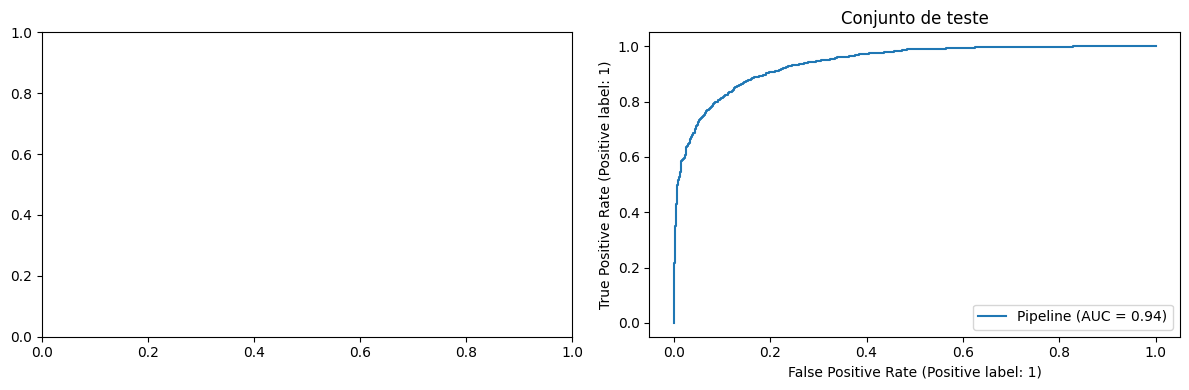

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

fig,axes = plt.subplots(1,2, figsize=(12, 4))


axes[1].set_title('Conjunto de teste')
RocCurveDisplay.from_estimator(melhor_modelo, x_test, y_test, ax=axes[1]);

plt.tight_layout()

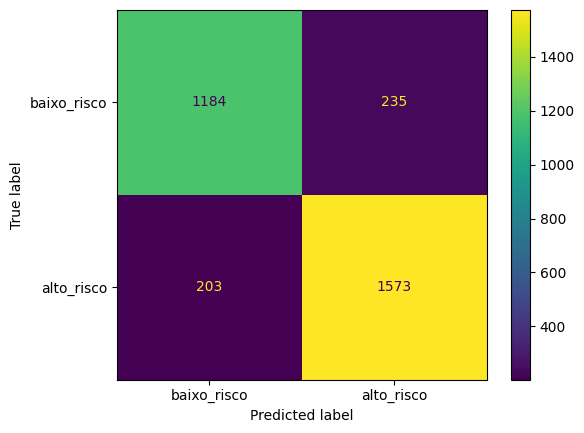

In [ ]:
ConfusionMatrixDisplay.from_estimator(melhor_modelo, x_test, y_test, values_format='d', display_labels=['baixo_risco',  'alto_risco']);

In [ ]:
from sklearn.metrics import classification_report, balanced_accuracy_score, accuracy_score

In [ ]:
print(classification_report(y_test, y_pred_oot))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1419
           1       0.87      0.89      0.88      1776

    accuracy                           0.86      3195
   macro avg       0.86      0.86      0.86      3195
weighted avg       0.86      0.86      0.86      3195



In [ ]:
print(f'Acurácia OOT: {accuracy_score(y_test, y_pred_oot):.4f}')
print(f'Acurácia Balanceada OOT: {balanced_accuracy_score(y_test, y_pred_oot):.4f}')

Acurácia OOT: 0.8629
Acurácia Balanceada OOT: 0.8600


# Explicando o Modelo

## Shap Values

Shap Values é um método agnóstico de explicação de modelos, especialmente utilizado para interpretar modelos considerados "black box", como os modelos baseados em árvores (random forest, xgboost, lightgbm, catboost).

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
import shap
print(shap.__version__)

explainer = shap.TreeExplainer(melhor_modelo[-1])
X_oot_transformado = melhor_modelo[:-1].transform(x_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


0.42.1


In [ ]:
shap_values = explainer.shap_values(X_oot_transformado)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


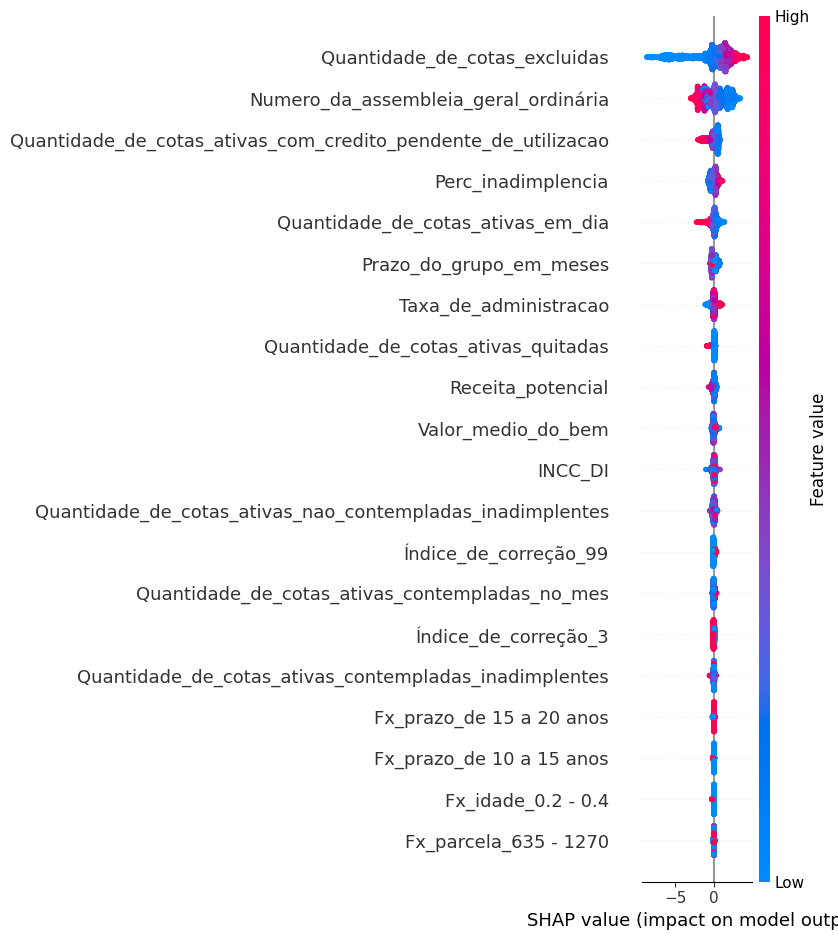

In [ ]:
shap.summary_plot(shap_values, X_oot_transformado)

As variáveis estão ordenadas de cima para baixo em ordem de importância para o modelo.

Olhando para a variável mais importante, `Quantidade_de_cotas_excluidas`, quanto maior o seu valor, maior será o impacto positivo na saída do modelo. Em outra palavras, quanto maior a `Quantidade_de_Cotas_excluidas`, maior será a propensão do grupo ser de alto risco!

Interpretação para a segunda variável mais importante `Numero_da_assembleia_geral_ordinária`: quanto menor o `Numero_da_assembleia_geral_ordinária`, maior a propensão do grupo ser de alto risco!

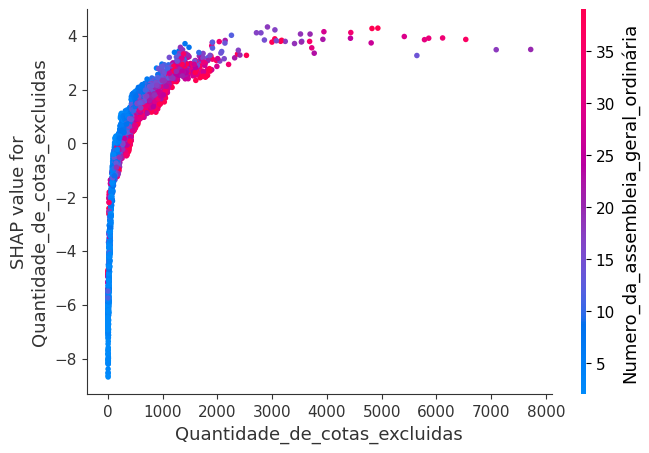

In [ ]:
shap.dependence_plot('Quantidade_de_cotas_excluidas', shap_values, X_oot_transformado, interaction_index='Numero_da_assembleia_geral_ordinária')

Quanto maior a `Quantidade_de_cotas_excluidas` e menor o `Numero_da_assembleia_geral_ordinária`, maior a propensão do grupo ser de alto risco.

**Podemos também criar cutoff para trigar um alerta. Por exemplo acima da 20ª Assembleia Geral ordinária e com 400 cotas excluídas, um alerta é gerado para a Squad de vendas buscar novos consorciados para reposição no grupo específico, outro para a Squad de retenção atuar nos cancelamentos e entendê-los e com isso garantir a sustentabilidade do negócio.**

# Salvar o modelo para usar posteriormente

In [ ]:
!pip install joblib

In [ ]:
import joblib

In [ ]:
!mkdir '/content/drive/MyDrive/modelos'

mkdir: cannot create directory ‘/content/drive/MyDrive/modelos’: File exists


In [ ]:
caminho = '/content/drive/MyDrive/modelos/modelo_classificacao_de_grupos_de_alto_risco_de_consorcio_de_imoveis.joblib'
joblib.dump(melhor_modelo, caminho)

['/content/drive/MyDrive/modelos/modelo_classificacao_de_grupos_de_alto_risco_de_consorcio_de_imoveis.joblib']

# Links de apoio

https://medium.com/pyladiesbh/estat%C3%ADstica-descritiva-1-ed523dffb99f
https://medium.com/data-hackers/como-avaliar-seu-modelo-de-classifica%C3%A7%C3%A3o-34e6f6011108
https://www.flai.com.br/juscudilio/como-calcular-as-metricas-de-validacao-dos-modelos-de-machine-learning-em-python/


---

# Comparando todas as técnicas de classificação
https://colab.research.google.com/drive/1l5HexQ52OaUXB03aKSkTAc_FypIVA715

**Licença deste notebook**:
<br>
<img align="left" width="80" src="https://licensebuttons.net/l/by/3.0/88x31.png" />

<br>
<br>

[Clique aqui para saber mais sobre a licença CC BY v4.0](https://creativecommons.org/licenses/by/4.0/legalcode.pt)


